In [1]:
# Upgrading Seaborn
!pip install --upgrade seaborn
# Importing Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Import Dataset**

In [3]:
url = 'https://drive.google.com/file/d/1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl/view'
path = 'https://drive.google.com/u/0/uc?id=1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl&export=download'+url.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# **Data Exploration**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 1000
Number of columns 11


In [7]:
# Dataset overview
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


## **About The Dataset**

**Overview:**
- Dataset contains 1000 rows, 10 features and 1 **Unnamed: 0** column which is the ID column.
- Dataset consists of 3 data types; float64, int64 and object.
- **Timestamp** feature could be changed into datetime data type.
- Dataset contains null values in various columns.

**Description:**
- **Unnamed: 0** =	ID of Customers
- **Daily Time Spent on Site** =	Time spent by the user on a site in minutes
- **Age** =	Customer's age in terms of years
- **Area Income** =	Average income of geographical area of consumer
- **Daily Internet Usage** =	Average minutes in a day consumer is on the internet
- **Male** =	Gender of the customer
- **Timestamp** =	Time at which user clicked on an Ad or the closed window
- **Clicked on Ad** =	Whether or not the customer clicked on an Ad	(Target Variable)
- **city** =	City of the consumer
- **province** =	Province of the consumer
- **category** =	Category of the advertisement

# **Exploratory Data Analysis**

## Feature engineering for EDA

### **Timestamp**

In [13]:
df_eda = df.copy()

In [14]:
# Converting Timestamp column into datetime

df_eda['Timestamp'] = pd.to_datetime(df_eda['Timestamp'])
df_eda['Timestamp'].dtypes

dtype('<M8[ns]')

In [15]:
df_eda['Timestamp'].dt.year.unique()

array([2016])

**Data is from 2016 only.**

In [17]:
df_eda['Timestamp'].dt.month.unique()

array([3, 4, 1, 6, 5, 7, 2])

### **Unnamed: 0**

In [19]:
# Renaming "Unnamed: 0 column into ID column"
df_eda.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

### **Male**

In [21]:
# Renaming "Male" column into Gender column
df_eda.rename(columns={'Male':'Gender'}, inplace=True)

## Descriptive Statistics

In [23]:
# Creating list of numerical and categorical columns
nums = [col for col in df_eda.columns if (df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64') and col != 'ID' ]
cats = [col for col in df_eda.columns if df_eda[col].dtype == 'object']

In [24]:
# Descriptive stats for numerical features
df_eda[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [25]:
# Descriptive stats for categorical features
df_eda[cats].describe()

,Gender,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [26]:
result = []
for col in df_eda.columns:
    result.append([col, df_eda[col].dtype, df_eda[col].isna().sum(), 100*df_eda[col].isna().sum()/len(df_eda[col]), df_eda[col].nunique(), df_eda[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,ID,int64,0,0.0,1000,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Gender,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,datetime64[ns],0,0.0,997,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 201..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


## Univariate analysis

### **Numerical features**

C:\Users\jawad\AppData\Local\Temp\ipykernel_10064\4190056746.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
C:\Users\jawad\AppData\Local\Temp\ipykernel_10064\4190056746.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
C:\Users\jawad\AppData\Local\Temp\ipykernel_10064\4190056746.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

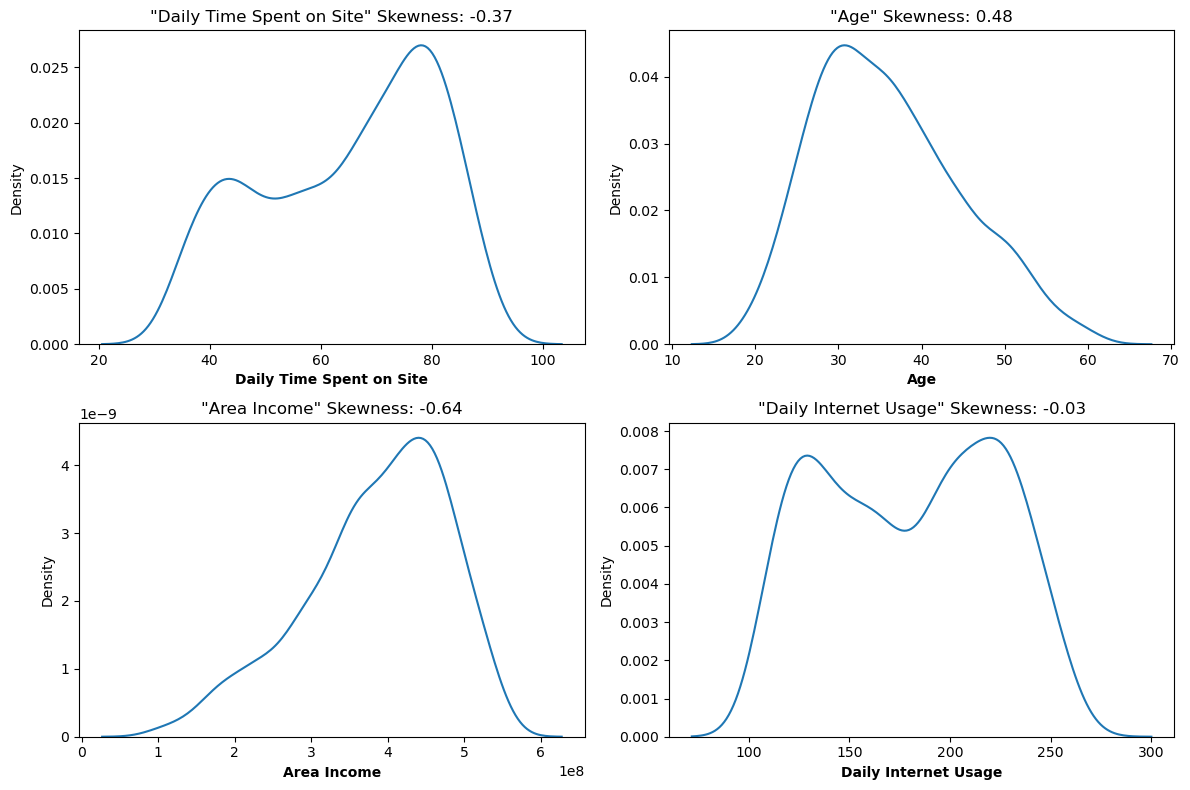

In [29]:
skewness = df_eda[nums].skew()

plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df_eda[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
    plt.tight_layout()

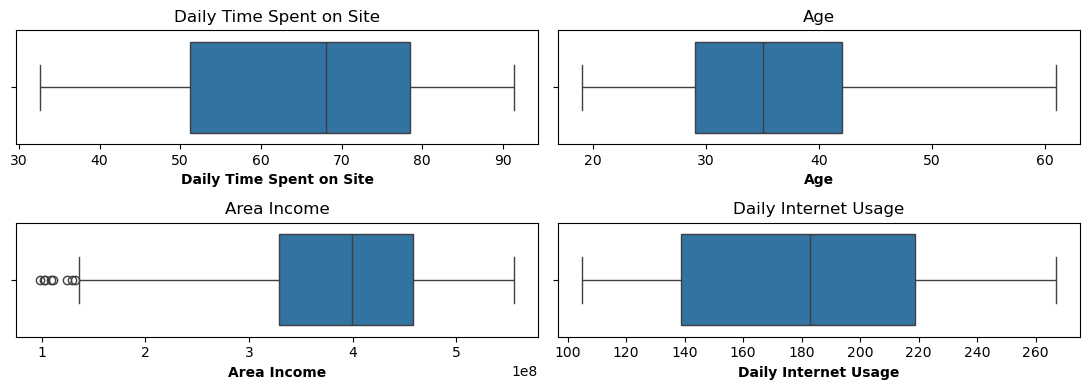

In [30]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df_eda[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

**Analysis:**
- **Area Income** is the only feature with a slight skew (left-skewed).
- **Daily Internet Usage** is nearly uniformly distributed.
- While **Age** and **Daily Time Spent on Site** is nearly normally distributed.


### **Categorical features**

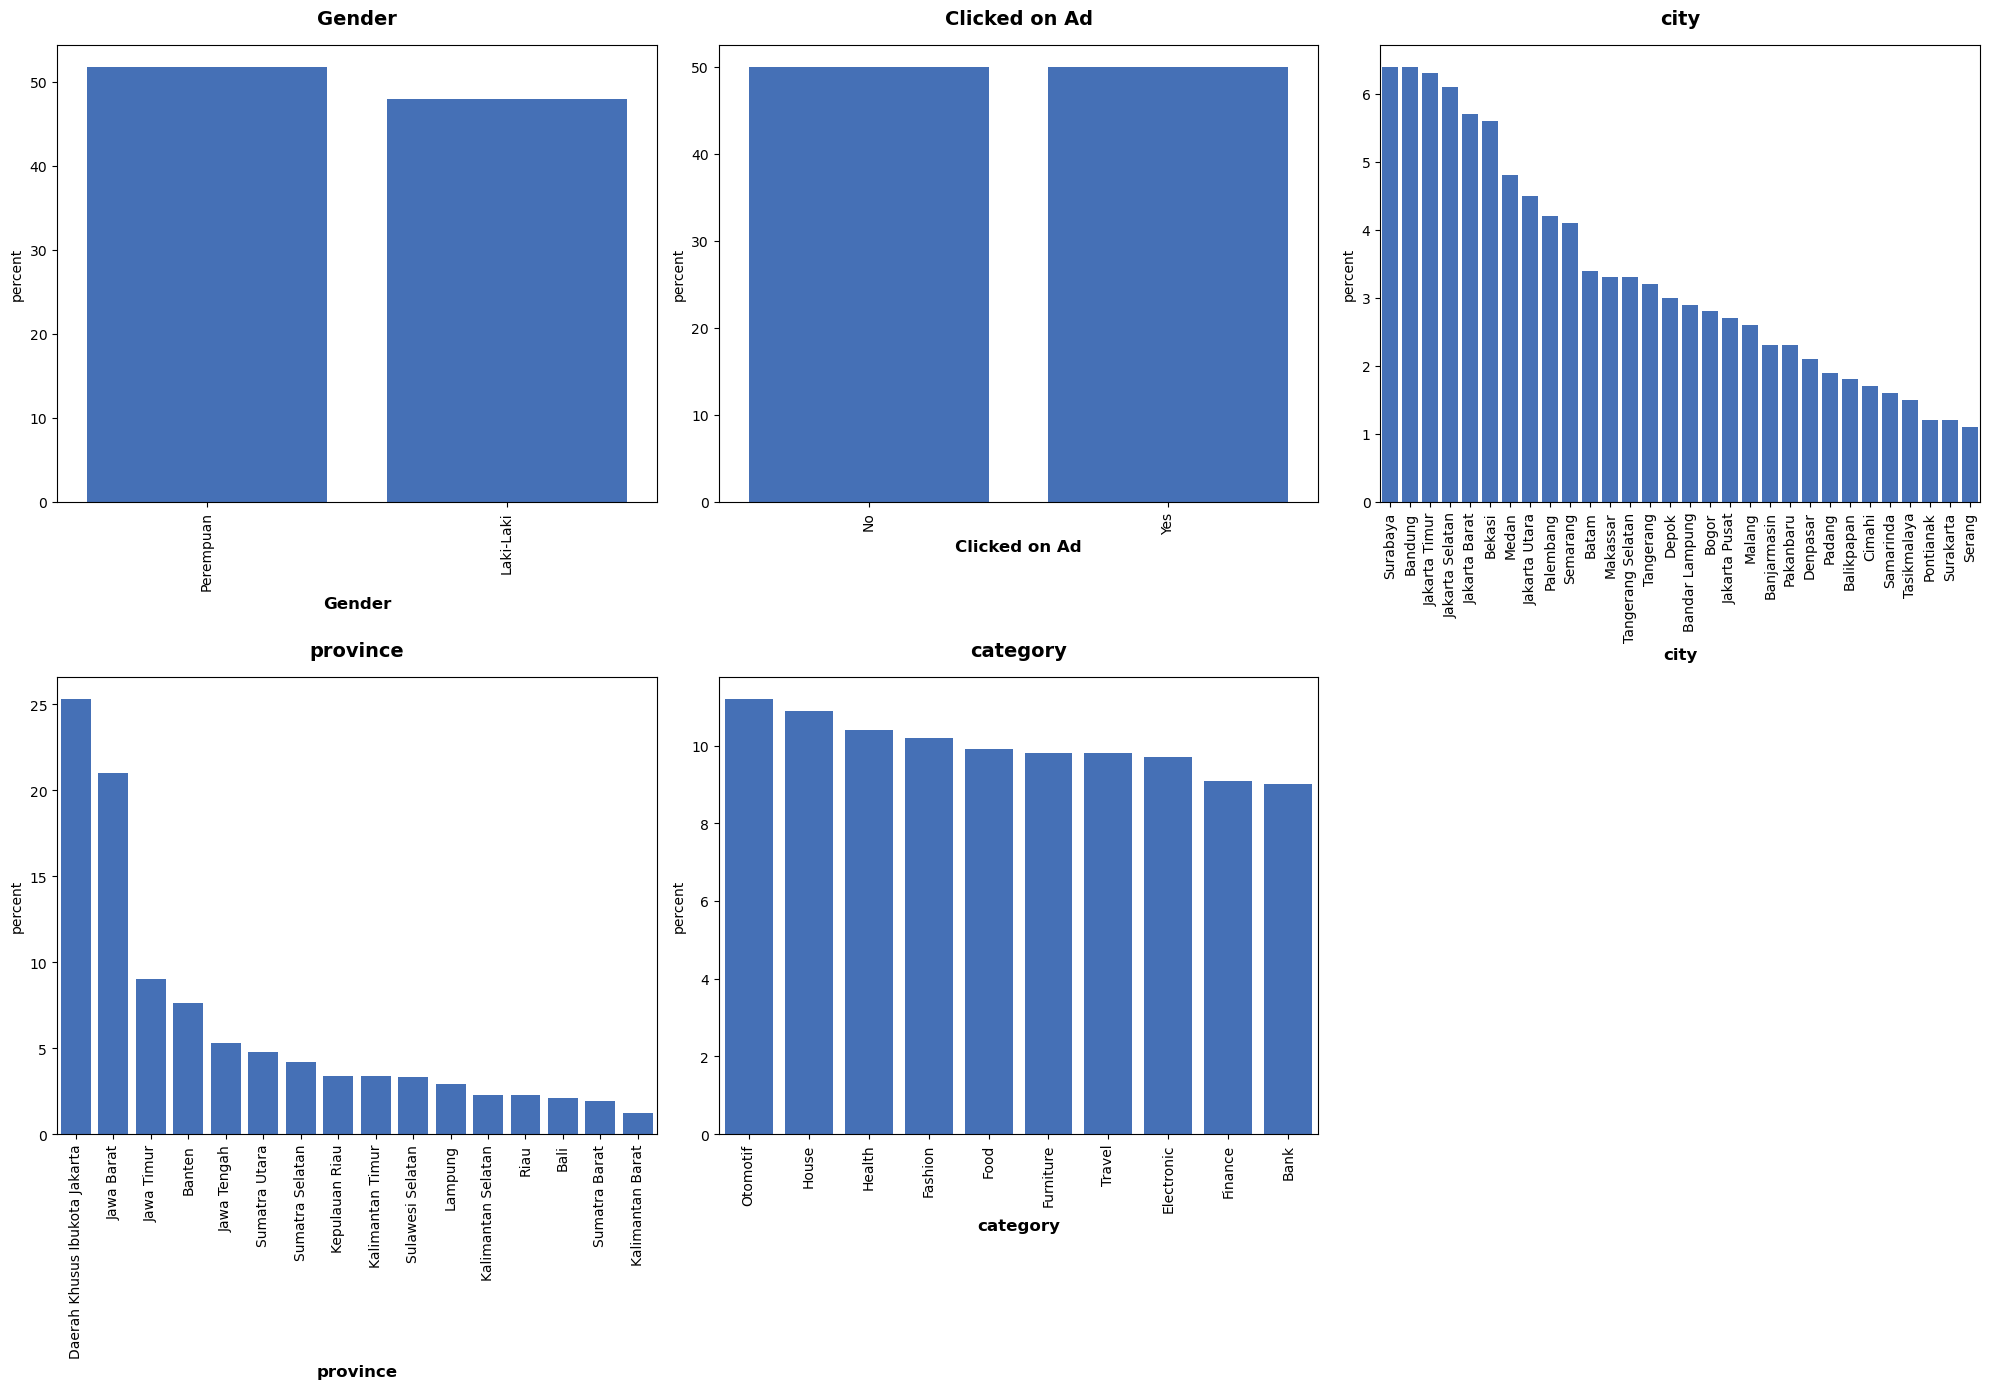

In [33]:
plt.figure(figsize=(20,14))
for i in range(len(cats)):
    order = df_eda[cats[i]].value_counts().index
    plt.subplot(2, 3, i+1)
    if len(df_eda[cats[i]].unique()) > 3:
      sns.countplot(x = df_eda[cats[i]], data = df_eda, order=order, color = '#326cc9', stat='percent')
    else:
      sns.countplot(x = df_eda[cats[i]], data = df_eda, order=order, color = '#326cc9', stat='percent')
    plt.xticks(rotation=90)
    plt.xlabel(cats[i], fontsize=12, fontweight = 'bold')
    plt.title(f'{cats[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

**Analysis:**
- **Gender** has an almost equal distribution of male and female.
- **Clicked on Ad** has an equal distribution of No and Yes.
- **Province** has 2 somewhat dominant values: DKI Jakarta and Jawa Barat.
- **category** is almost equally distributed among the all the values.

## Bivariate analysis

### **Numerical features**

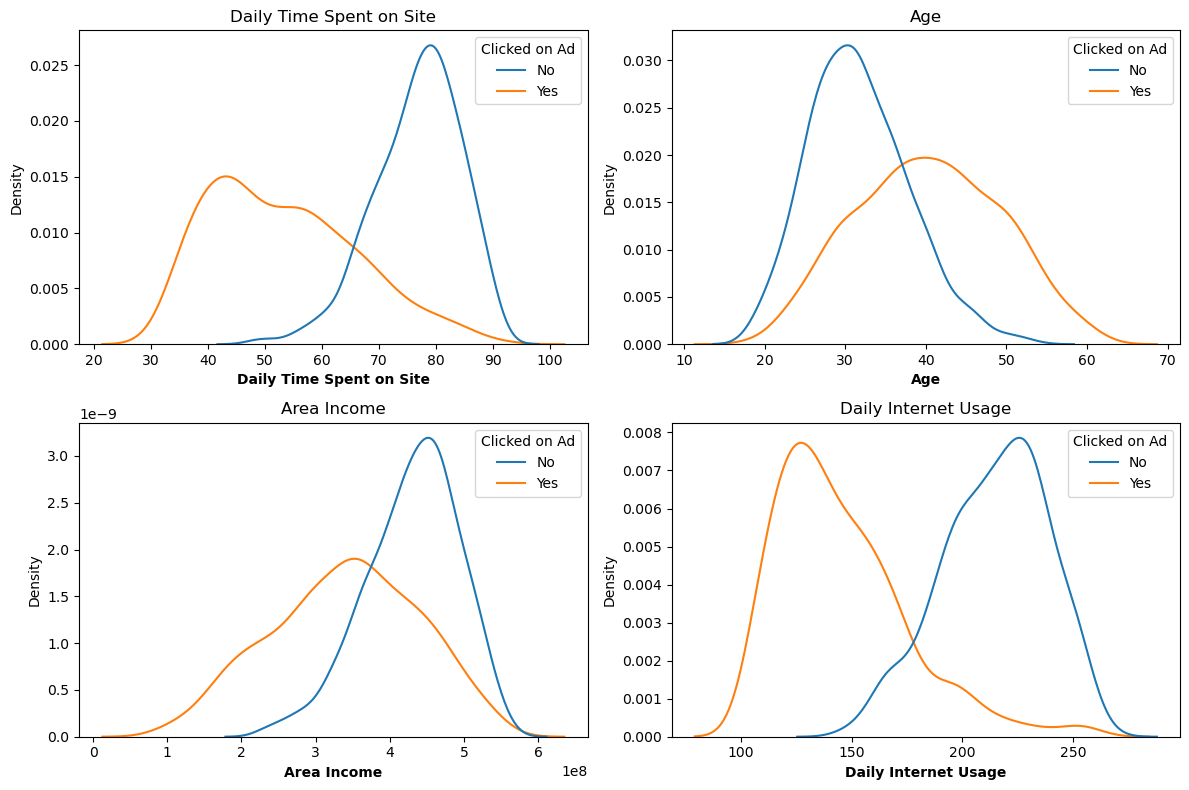

In [37]:
plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=nums[i], hue='Clicked on Ad', data=df_eda)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

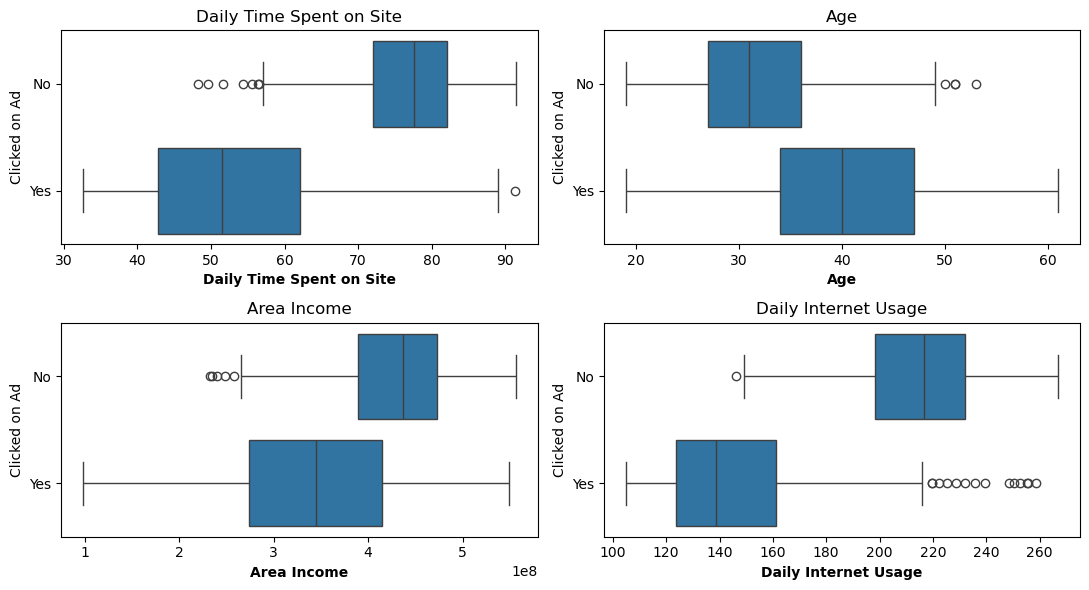

In [38]:
plt.figure(figsize=(11, 6))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = nums[i], y='Clicked on Ad', data=df_eda)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

**Analysis:**
- The more time is spent on site by the customer the less likely they will click on an ad.
- The average age of customers that clicked on an ad is 40, while the average for those that didn't is 31.
- The average area income of customers that clicked on an ad is considerably lower than those that didn't.
- Similar to time spent, the more the daily internet usage is, the less likely the customer will click on an ad.

### **Categorical features**

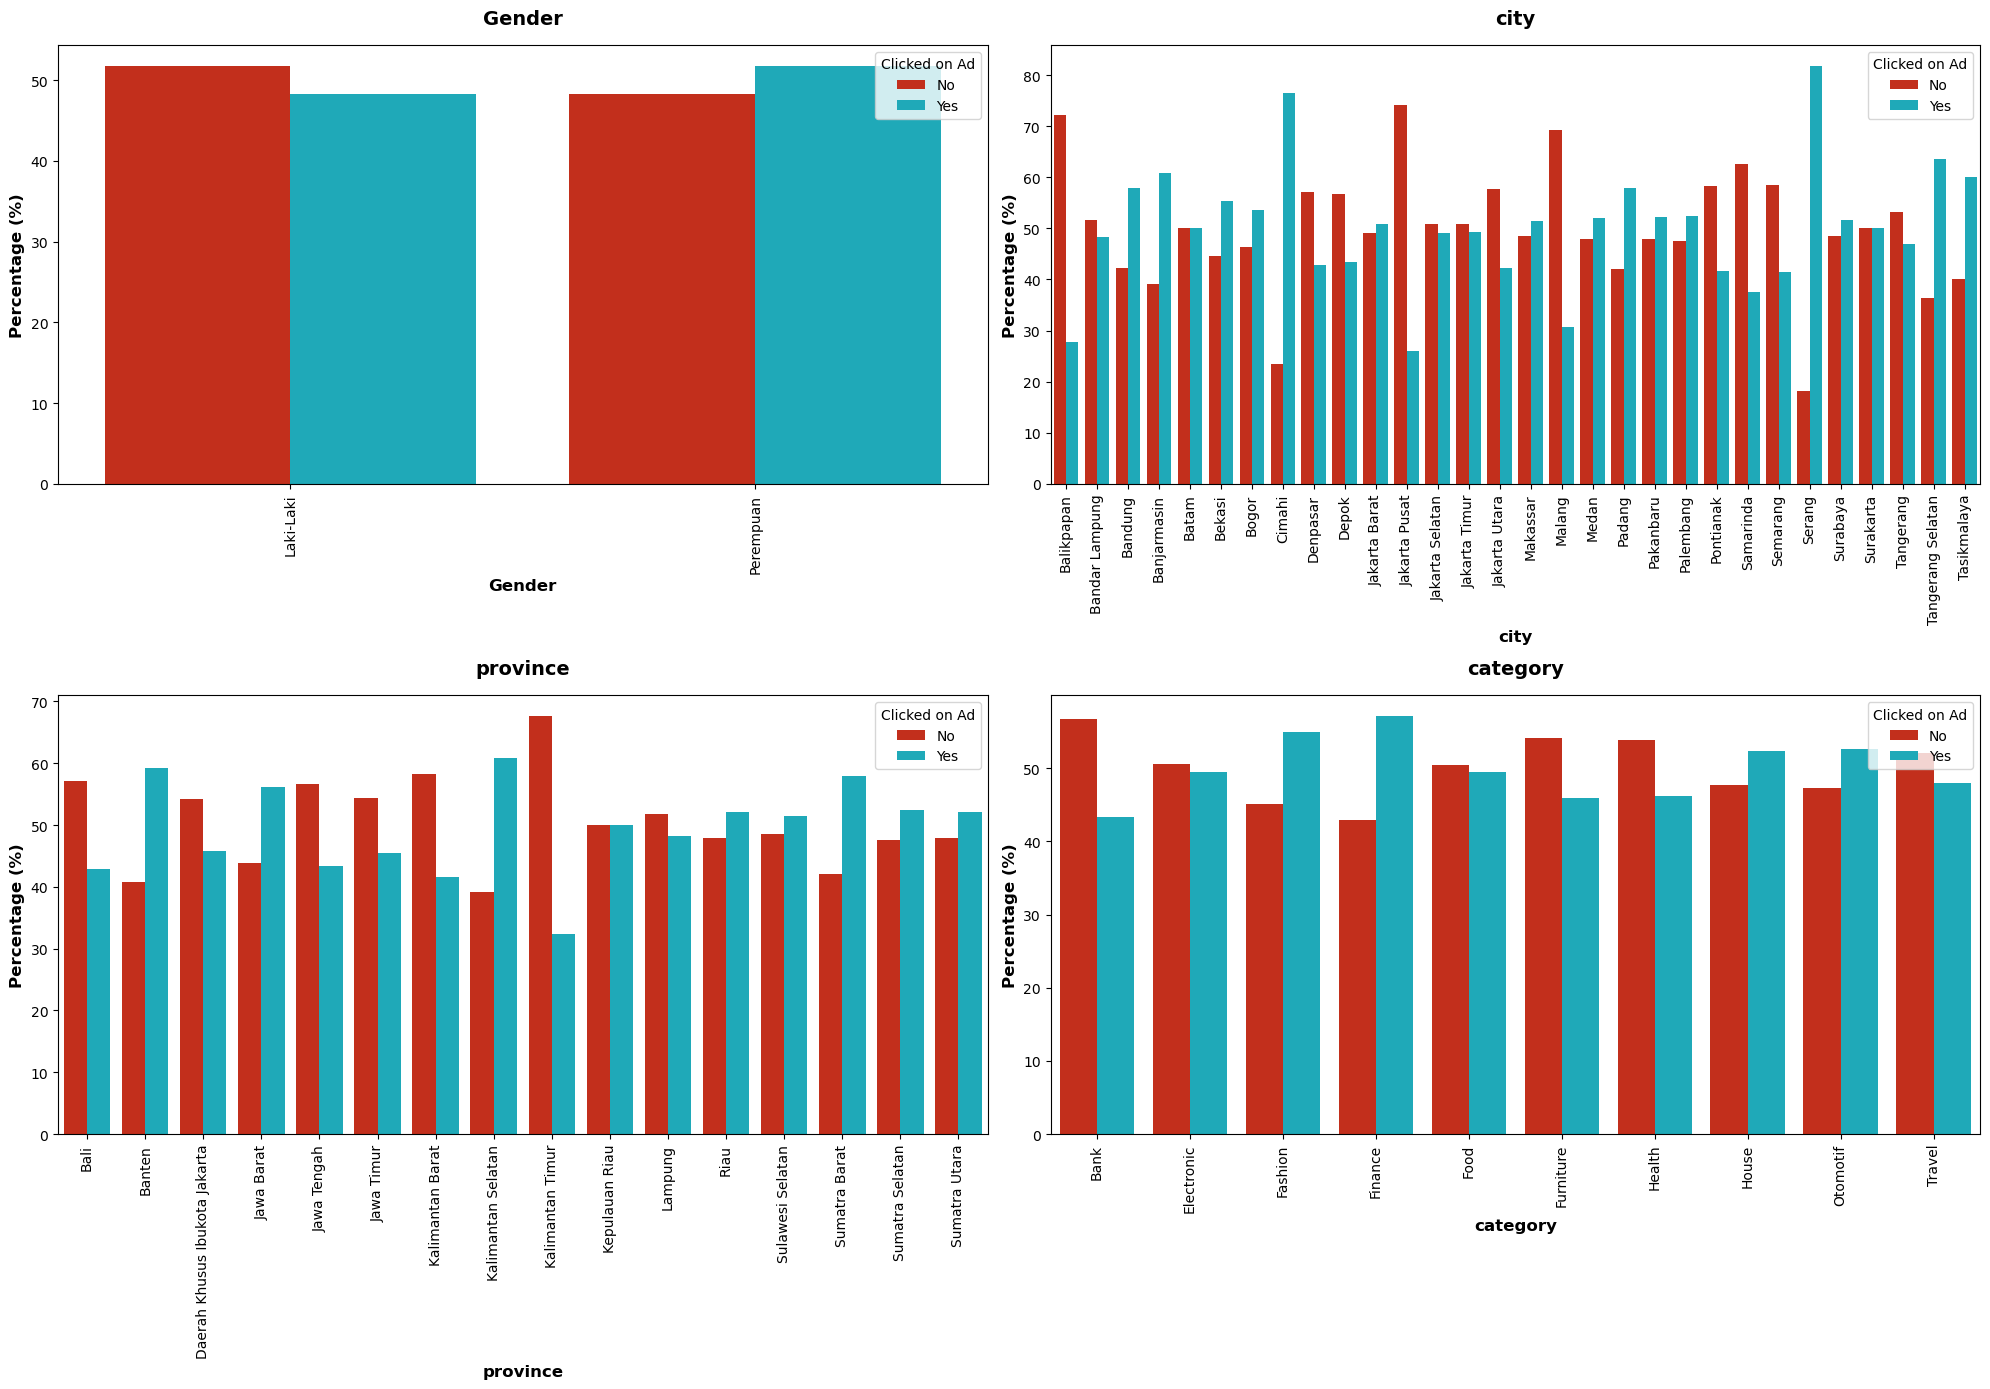

In [41]:
cats1=cats.copy()
cats1.remove('Clicked on Ad')
df_temp = df_eda.copy()
plt.figure(figsize=(20,14))
for i in range(len(cats1)):
    df_total = df_temp.groupby(cats1[i])['ID'].count().reset_index().rename(columns={'ID':'total'})
    df_subtotal = df_temp.groupby([cats1[i], 'Clicked on Ad'])['ID'].count().reset_index().rename(columns={'ID':'subtotal'})
    dfm = df_subtotal.merge(df_total, on=cats1[i])
    dfm['Percentage'] = round(dfm['subtotal']/dfm['total']*100, 2)

    plt.subplot(2, 2, i+1)
    sns.barplot(x = cats1[i], y='Percentage', data = dfm, palette = ['#de1a00', '#06bdd1'], hue='Clicked on Ad')
    plt.xticks(rotation=90)
    plt.xlabel(cats1[i], fontsize=12, fontweight = 'bold')
    plt.ylabel('Percentage (%)', fontsize=12, fontweight = 'bold')
    plt.title(f'{cats1[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

**Analysis:**
- Females clicked on an ad slightly more than males overall.
- The city with the highest click rate is Serang with 81%, while the city with the lowest is Jakarta Pusat with 26%.
- The top 3 provinces with the highest click rates are Kalimantan Selatan, Banten, Sumatra Barat.
- Ad categories' click rates are pretty equal with none below 40% and none above 60%.

### **Age vs. Daily Internet Usage**

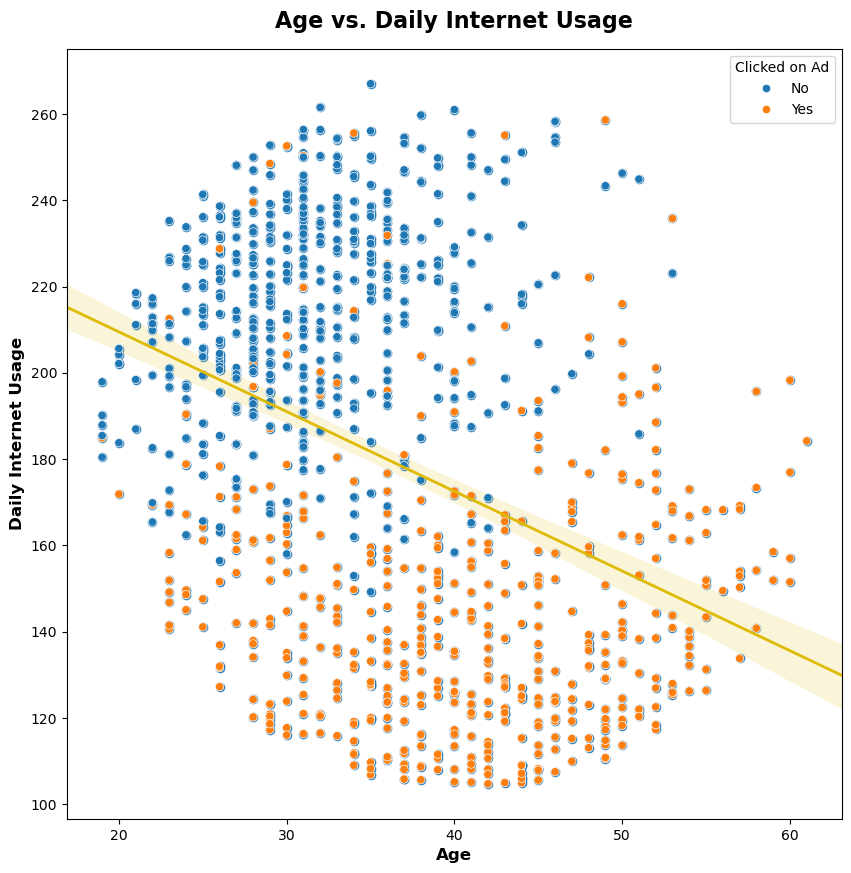

In [44]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_eda, x="Age", y="Daily Internet Usage", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Internet Usage', data = df_eda, hue='Clicked on Ad')
plt.ylabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Internet Usage', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**

Age is slightly negatively correlated with Daily Internet Usage. Older customers spend less time on the internet on average compared to younger customers.

### **Age vs. Daily Time Spent on Site**

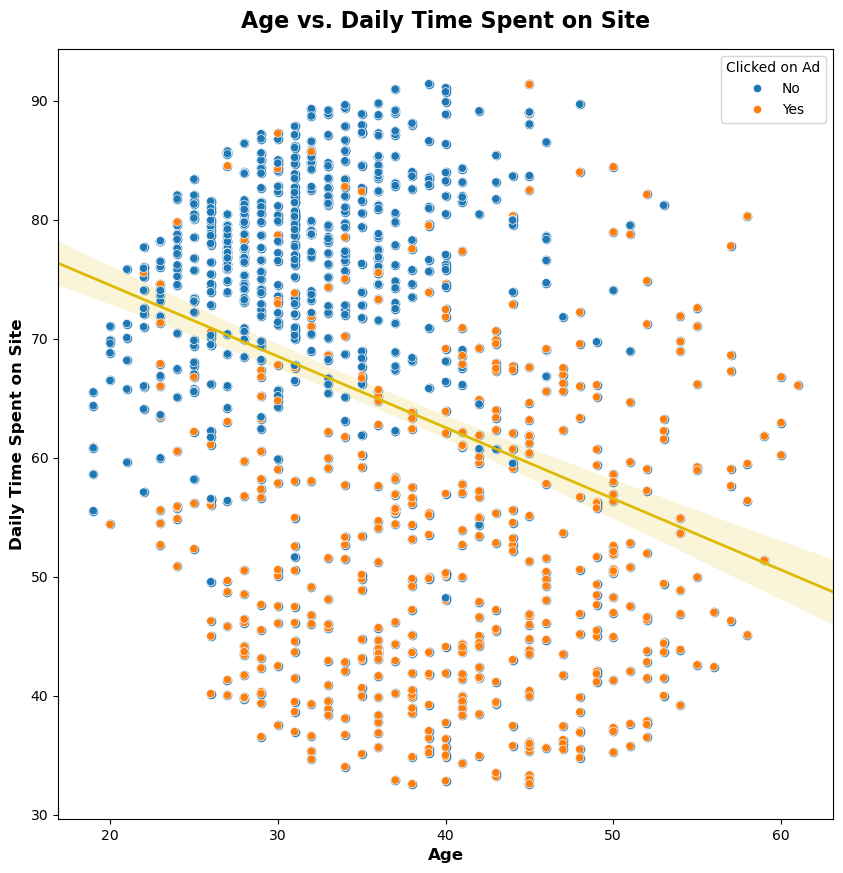

In [47]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_eda, x="Age", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Time Spent on Site', data = df_eda, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**

Same as with Daily Internet Usage, Age is slightly negatively correlated with Daily Time Spent on Site.

### **Daily Internet Usage vs. Daily Time Spent on Site**

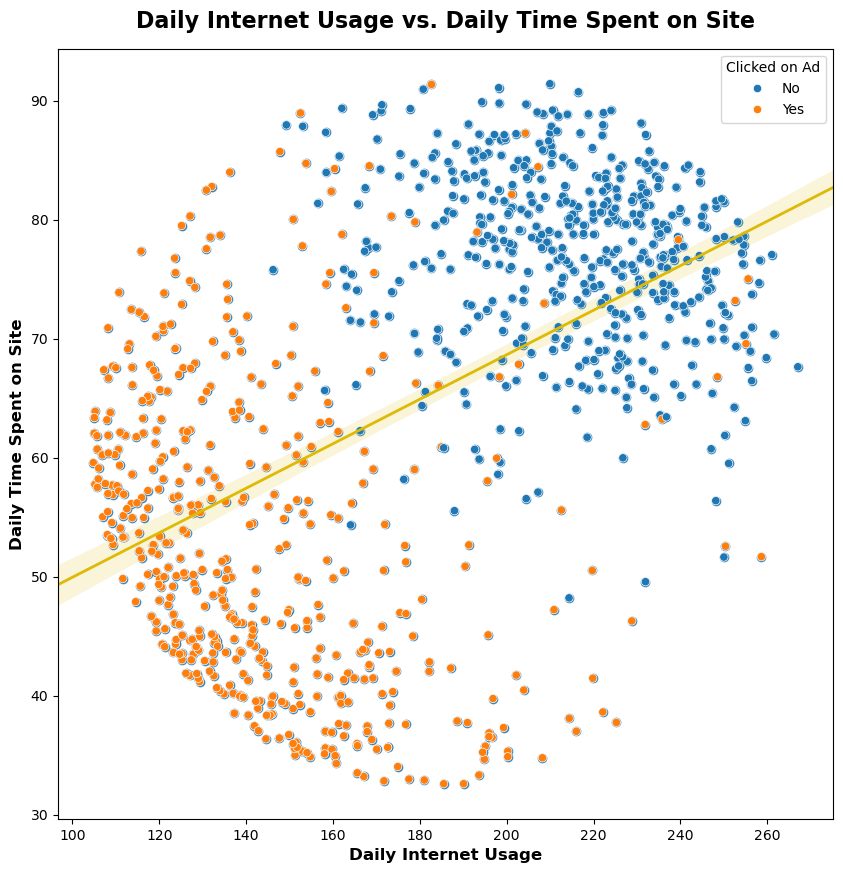

In [50]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_eda, x="Daily Internet Usage", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Daily Internet Usage', y = 'Daily Time Spent on Site', data = df_eda, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.title('Daily Internet Usage vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**

Internet usage is positively correlated with time spent on site. As can be seen from the above chart, there is a quite clear separation between two clusters of data. One cluster is less active and the other more so. Less active customers have a higher tendency to click on an ad compared to more active customers.

## Multivariate analysis

### **Correlation heatmap of numerical features**

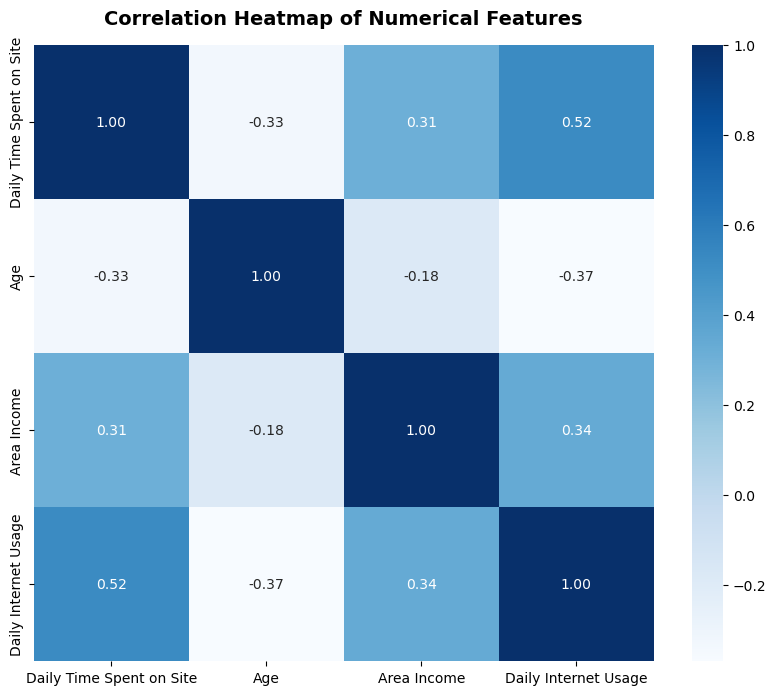

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_eda[nums].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.show()

### **Numerical features' correlation with target**

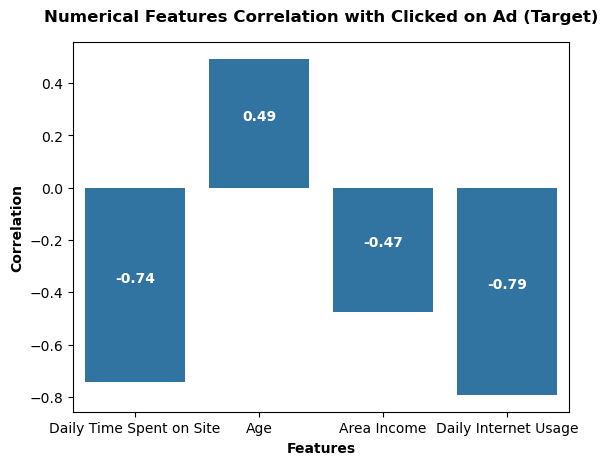

In [56]:
correlation = []
df_pb = df_eda.copy()
df_pb['Clicked on Ad'] = np.where(df_pb['Clicked on Ad'] == 'Yes', 1, 0)
df_pb.dropna(inplace=True)
for i in range(len(nums)):
  corr, p = stats.pointbiserialr(df_pb['Clicked on Ad'], df_pb[nums[i]])
  vals = [nums[i], corr]
  correlation.append(vals)

df_corr = pd.DataFrame(data = correlation, columns=['Features', 'Correlation'])
bar = sns.barplot(x='Features', y='Correlation', data=df_corr)
plt.ylabel('Correlation', fontsize=10, fontweight = 'bold')
plt.xlabel('Features', fontsize=10, fontweight = 'bold')
plt.title('Numerical Features Correlation with Clicked on Ad (Target)', fontsize=12, fontweight = 'bold', pad = 15)

for i in bar.patches:
  height = i.get_height()
  width = i.get_width()
  x = i.get_x()
  y = i.get_y()
  bar.annotate(f'{round(height, 2)}', (x + width/2, y + (height/2)), ha='center', va='bottom', color = 'white', fontweight = 'bold')

plt.show()

### **Categorical features' correlation (Cramer's V)**

In [58]:
def cramers_v(var1, var2):
    data = pd.crosstab(var1, var2).values
    chi_2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    phi_2 = chi_2 / n
    r, k = data.shape
    return np.sqrt(phi_2 / min((k-1), (r-1)))

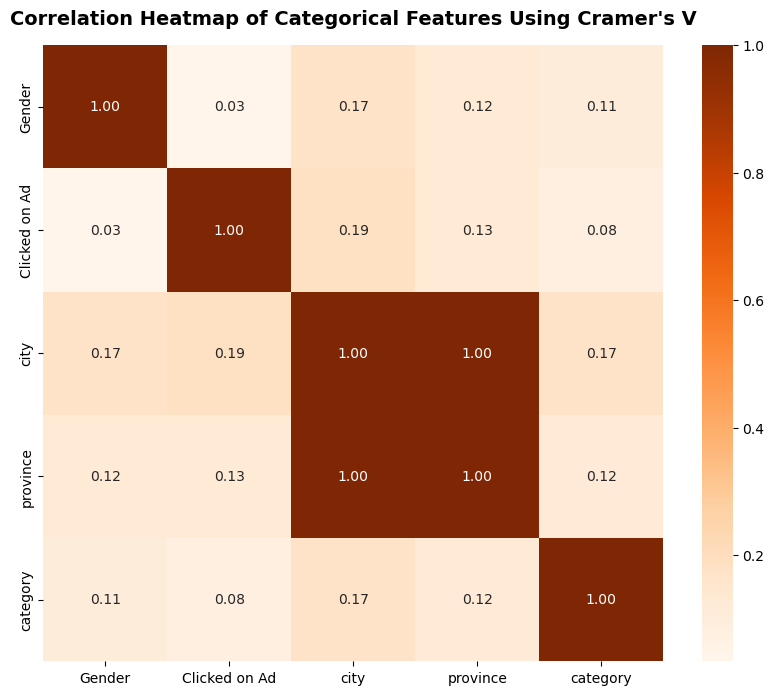

In [59]:
crv=[]
for i in range(len(cats)):
  row=[]
  for j in range(len(cats)):
    val = cramers_v(df_eda[cats[i]], df_eda[cats[j]])
    row.append(val)
  crv.append(row)
df_crv = pd.DataFrame(data=crv, columns=cats, index=cats)
df_crv

plt.figure(figsize=(10, 8))

sns.heatmap(df_crv, cmap='Oranges', annot=True, fmt='.2f')
plt.title("Correlation Heatmap of Categorical Features Using Cramer's V", fontsize=14, fontweight='bold', pad=15)
plt.show()

### **Analysis**

**Numerical Correlations:**

- **Daily Time Spent on Site and Daily Internet Usage** (0.52): <br>These two variables have a relatively strong positive correlation. This means that as people use the internet more, they tend to spend more time on the site on a daily basis. This could indicate that the website is engaging and users spend more time using it while online.

- **Daily Time Spent on Site and Age** (-0.33): <br>There is a moderate negative correlation between age and the time spent on the site. Older users tend to spend less time on the site. This could suggest that younger individuals may be more active on the site.

- **Daily Time Spent on Site and Area Income** (0.31): <br>There is a moderate positive correlation between daily time spent on the site and area income. This could mean that people with higher area income levels spend more time on the site, although the correlation is not very strong.

- **Age and Daily Internet Usage** (-0.37): <br>There is a moderate negative correlation between age and daily internet usage. Older individuals tend to use the internet less on a daily basis. This might be because younger individuals are more likely to be digitally active.

- **Age and Area Income** (-0.18): <br>There is a weak negative correlation between age and area income. This suggests that older individuals tend to have slightly lower area income, but the correlation is not strong at all.

- **Area Income and Daily Internet Usage** (0.34): <br>There is a moderate positive correlation between area income and daily internet usage. People with higher area incomes tend to use the internet more on a daily basis. This could be because they have better access to technology and higher-speed internet connections.
****
**Categorical Correlations (Cramer's V):**

- **Gender and City** (0.17): <br>There is a moderate positive association between gender and city. This suggests that there may be some relationship between a user's gender and the city in which they are located. However, the association is not particularly strong.

- **Gender and Province** (0.12): <br>There is a moderate positive association between gender and province. This implies that a user's gender might be somewhat related to their province of residence, but again, the association is not very strong.

- **Gender and Category** (0.11): <br>There is a moderate positive association between gender and category. This indicates that a user's gender might have some influence on the category they are interested in, but the association is not very strong.

- **City and Province** (1.0): <br>The perfect correlation coefficient of 1 indicates that city and province are perfectly associated. This is likely due to the dataset structure and may not provide meaningful information about the relationship between these variables.

- **City and Category** (0.17): <br>There is a moderate positive association between city and category. This suggests that a user's city may be related to the category they are interested in, but the association is not very strong.

- **Province and Category** (0.12): <br>There is a moderate positive association between province and category. This implies that the province of a user may have some influence on the category they are interested in, although the association is not very strong.
****
**Correlations with Target Variable:**

- **Gender and Clicked on Ad** (0.03): <br>There is a very weak positive association between gender and whether a user clicked on the ad.

- **Clicked on Ad and City** (0.19): <br>There is a moderate positive association between whether a user clicked on the ad and their city. This suggests that the city of the user may be somewhat related to their likelihood of clicking on the ad.

- **Clicked on Ad and Province** (0.13): <br>There is a moderate positive association between whether a user clicked on the ad and their province. This implies that a user's province might have some influence on their likelihood of clicking on the ad.

- **Clicked on Ad and Category** (0.08): <br>There is a very weak positive association between whether a user clicked on the ad and the category.

- **Daily Time Spent on Site** (-0.74): <br>The negative correlation coefficient of -0.74 indicates a strong negative relationship between "Daily Time Spent on Site" and the likelihood of a user clicking on the ad. This suggests that as users spend more time on the site, they are less likely to click on the ad. This could mean that users who spend a lot of time on the site might be more engaged with the content and less likely to click on ads.

- **Age** (0.49): <br>The positive correlation coefficient of 0.49 suggests a moderate positive relationship between a user's age and the likelihood of clicking on the ad. In other words, older individuals are more likely to click on the ad.

- **Area Income** (-0.47): <br>The negative correlation coefficient of -0.47 indicates a moderate negative relationship between "Area Income" and the likelihood of clicking on the ad. Users in areas with lower income levels are more likely to click on the ad.

- **Daily Internet Usage** (-0.79): <br>The negative correlation coefficient of -0.79 suggests a strong negative relationship between "Daily Internet Usage" and the likelihood of clicking on the ad. Users who spend more time on the internet are less likely to click on the ad. This could imply that users who are more active internet users might be less responsive to online advertisements.

# **Data Cleaning & Preprocessing**

In [63]:
df1 = df.copy()

In [64]:
# Creating list of numerical and categorical columns
nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64') and col != 'Unnamed: 0' ]
cats = [col for col in df1.columns if df1[col].dtype == 'object' and col != 'Timestamp']

## Handling missing values

In [66]:
result = []
for col in df1.columns:
    result.append([col, df1[col].dtype, df1[col].isna().sum(), 100*df1[col].isna().sum()/len(df1[col])])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null'.split())
output

,column,data_type,no._null,percent_null
0,Unnamed: 0,int64,0,0.0
1,Daily Time Spent on Site,float64,13,1.3
2,Age,int64,0,0.0
3,Area Income,float64,13,1.3
4,Daily Internet Usage,float64,11,1.1
5,Male,object,3,0.3
6,Timestamp,object,0,0.0
7,Clicked on Ad,object,0,0.0
8,city,object,0,0.0
9,province,object,0,0.0


**There are 4 features with null values; <code>Daily Time Spent on Site</code>, <code>Area Income</code>, <code>Daily Internet Usage</code>, <code>Male</code>.**

### **Numerical Features**

In [69]:
df1[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


- **By looking at the Univariate Analysis in the previous section, the feature with missing values and a skewed distribution is <code>Area Income</code>. This feature's null values will therefore be imputed using the <code>median</code>.**
- **The rest of the numerical features with null values will be imputed using the <code>mean</code>.**

### **Categorical Features**

In [72]:
df1[cats].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


**The null values in the <code>Male</code> feature will be imputed using the <code>mode</code>.**

### **Imputing null values**

In [75]:
# Imputing numerical features
df1['Area Income'].fillna(df1['Area Income'].median(), inplace=True)
df1['Daily Time Spent on Site'].fillna(df1['Daily Time Spent on Site'].mean(), inplace=True)
df1['Daily Internet Usage'].fillna(df1['Daily Internet Usage'].mean(), inplace=True)

# Imputing categorical features
df1['Male'].fillna(df1['Male'].mode()[0], inplace=True)

# Checking result
print(f'Total null values in dataset: {df1.isna().sum().sum()}')

Total null values in dataset: 0


C:\Users\jawad\AppData\Local\Temp\ipykernel_10064\71360169.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Area Income'].fillna(df1['Area Income'].median(), inplace=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_10064\71360169.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

## Handling duplicated data

In [77]:
print(f'Dataset contains duplicated values: {df1.duplicated().any()}')
print(f'Number of duplicates present in dataset: {df1.duplicated().sum()}')

Dataset contains duplicated values: False
Number of duplicates present in dataset: 0


**The Dataset does not have <code>duplicates</code>.**

## Feature Engineering

### **Feature Extraction**

In [81]:
# Extracting Year, Month, Week and Day from Timestamp feature

# Changing data type of Timestamp feature into datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# Extracting Year
df1['Year'] = df1.Timestamp.dt.year

# Extracting Month
df1['Month'] = df1.Timestamp.dt.month

# Extracting Week
df1['Week'] = df1.Timestamp.dt.isocalendar().week

# Extracting Day
df1['Day'] = df1.Timestamp.dt.dayofweek

df1.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
722,722,39.47,43,459032350.0,163.48,Laki-Laki,2016-07-06 23:09:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Finance,2016,7,27,2
35,35,84.37,30,429726500.0,201.58,Perempuan,2016-04-12 03:26:00,No,Surakarta,Jawa Tengah,Travel,2016,4,15,1
521,521,63.26,29,383511590.0,120.46,Laki-Laki,2016-03-02 04:02:00,Yes,Medan,Sumatra Utara,Health,2016,3,9,2
992,992,69.17,40,463356670.0,123.62,Perempuan,2016-03-06 11:36:00,Yes,Bandar Lampung,Lampung,House,2016,3,9,6
989,989,70.96,31,386314950.0,256.40,Perempuan,2016-06-26 07:01:00,No,Semarang,Jawa Tengah,Furniture,2016,6,25,6


In [82]:
df1[df1['Week']==53].head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
132,132,51.24,36,534578170.0,176.73,Perempuan,2016-01-03 16:01:00,Yes,Malang,Jawa Timur,Health,2016,1,53,6
180,180,39.85,38,219403730.0,145.96,Perempuan,2016-01-03 03:22:00,Yes,Semarang,Jawa Tengah,Fashion,2016,1,53,6
190,190,50.08,30,291409020.0,123.91,Perempuan,2016-01-03 05:34:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,1,53,6
337,337,75.32,28,419989500.0,233.60,Laki-Laki,2016-01-01 21:58:00,No,Bekasi,Jawa Barat,Fashion,2016,1,53,4
430,430,88.72,32,307093570.0,211.87,Laki-Laki,2016-01-03 17:10:00,No,Bogor,Jawa Barat,Health,2016,1,53,6


As can be seen from the above, <code>Week</code> has the value 53 in it, even though the dataset only has data up until <code>Month</code> 7. This is a consequence of how **ISO** week numbering works. Therefore <code>Week</code> 53 will be converted to <code>Week</code> 0, as to preserve the order of the <code>Week</code> feature.

**Note: <code>Day</code> is Monday to Sunday, with 0 being Monday and 6 Sunday.**

In [84]:
df1['Week'] = np.where(df1['Week'] == 53, 0, df1['Week'])
df1['Week'] = df1['Week'].astype(int)
df1[df1['Week']==0].head(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
132,132,51.24,36,534578170.0,176.73,Perempuan,2016-01-03 16:01:00,Yes,Malang,Jawa Timur,Health,2016,1,0,6
180,180,39.85,38,219403730.0,145.96,Perempuan,2016-01-03 03:22:00,Yes,Semarang,Jawa Tengah,Fashion,2016,1,0,6
190,190,50.08,30,291409020.0,123.91,Perempuan,2016-01-03 05:34:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,1,0,6


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Year                      1000 non-null   int32         
 12  Month                

### **Changing inappropriate column names**

In [87]:
df1.rename(columns = {'Unnamed: 0':'ID', 'Male':'Gender'}, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Year                      1000 non-null   int32         
 12  Month                

In [88]:
# Creating list of numerical and categorical columns
nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64') and col != 'ID' and col != 'Year' and col != 'Month' and col != 'Week' and col != 'Day']
cats = [col for col in df1.columns if df1[col].dtype == 'object']

## Handling Outliers

**From the Univariate Analysis it can be seen that the only numerical feature with outliers is <code>Area Income</code>. Therefore only said feature will have its outliers handled (using the IQR Method).**

In [91]:
# Trimming outliers using the IQR method
print(f'Number of rows prior to filtering: {len(df1)}')

q1 = df1['Area Income'].quantile(0.25)
q3 = df1['Area Income'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
df1 = df1[(df1['Area Income']>=low)&(df1['Area Income']<=upper)]

print(f'Number of rows after filtering: {len(df1)}')

Number of rows prior to filtering: 1000
Number of rows after filtering: 991


### **Checking boxplot**

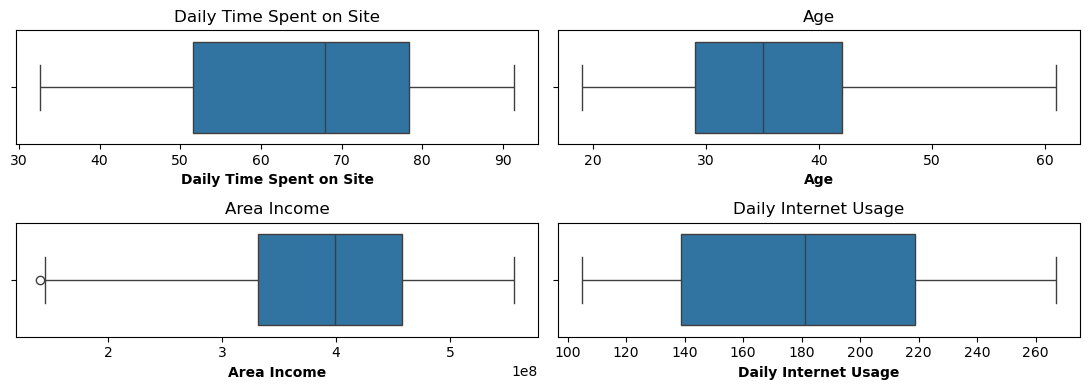

In [93]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df1[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

**As can be seen above, <code>Area Income</code> has no glaring outliers remaining.**

## Feature Encoding

In [96]:
df_enc = df1.copy()
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        991 non-null    int64         
 1   Daily Time Spent on Site  991 non-null    float64       
 2   Age                       991 non-null    int64         
 3   Area Income               991 non-null    float64       
 4   Daily Internet Usage      991 non-null    float64       
 5   Gender                    991 non-null    object        
 6   Timestamp                 991 non-null    datetime64[ns]
 7   Clicked on Ad             991 non-null    object        
 8   city                      991 non-null    object        
 9   province                  991 non-null    object        
 10  category                  991 non-null    object        
 11  Year                      991 non-null    int32         
 12  Month                     9

**The <code>Year</code>, <code>Month</code>, <code>Week</code> and <code>Day</code> features have already been encoded as integers. Therefore only the features with <code>object</code> data type will be encoded.**

### **Label encoding**

**Only <code>Gender</code> and <code>Clicked on Ad</code> features will be label encoded.**

In [100]:
df_enc['Gender'].value_counts()

Gender
Perempuan    518
Laki-Laki    473
Name: count, dtype: int64

In [101]:
# Label encoding Gender feature
df_enc['Gender'] = np.where(df_enc['Gender'] == 'Laki-Laki', 1, 0)
df_enc['Gender'].value_counts()

Gender
0    518
1    473
Name: count, dtype: int64

In [102]:
df_enc['Clicked on Ad'].value_counts()

Clicked on Ad
No     500
Yes    491
Name: count, dtype: int64

In [103]:
# Label encoding Target feature
df_enc['Clicked on Ad'] = np.where(df_enc['Clicked on Ad'] == 'Yes', 1, 0)
df_enc['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    491
Name: count, dtype: int64

### **One-Hot Encoding**

In [105]:
print(f"Unique values of category: {df_enc['category'].nunique()}")
print(f"Unique values of category: {df_enc['city'].nunique()}")
print(f"Unique values of category: {df_enc['province'].nunique()}")

Unique values of category: 10
Unique values of category: 30
Unique values of category: 16


**To avoid the <mark>curse of dimensionality</mark>, the only feature that will be One-Hot encoded is the <code>category</code> feature. The rest will be discarded later.**

In [107]:
pd.set_option('display.max_columns', None)

In [108]:
# One hot encoding
df_enc = pd.get_dummies(df_enc, columns=['category'])
df_enc.head(3)

,ID,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,3,12,6,False,False,False,False,False,True,False,False,False,False
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,2016,4,14,0,False,False,False,False,True,False,False,False,False,False
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,2016,3,10,6,False,True,False,False,False,False,False,False,False,False


In [109]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        991 non-null    int64         
 1   Daily Time Spent on Site  991 non-null    float64       
 2   Age                       991 non-null    int64         
 3   Area Income               991 non-null    float64       
 4   Daily Internet Usage      991 non-null    float64       
 5   Gender                    991 non-null    int32         
 6   Timestamp                 991 non-null    datetime64[ns]
 7   Clicked on Ad             991 non-null    int32         
 8   city                      991 non-null    object        
 9   province                  991 non-null    object        
 10  Year                      991 non-null    int32         
 11  Month                     991 non-null    int32         
 12  Week                      9

## Feature selection

- **<code>ID</code> will be discarded because it is an index column.**
- **<code>Timestamp</code> will be discarded because its values have already been extracted.**
- **<code>city</code> will be discarded because of high number of unique values.**
- **<code>province</code> will similarly be discarded because of high number of unique values.**
- **<code>Year</code> will be discarded because its value is constant (2016).**

In [112]:
df_clean = df_enc.select_dtypes(['float64', 'int64','int32'])
df_clean = df_clean.drop(columns=['ID', 'Year'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Gender                    991 non-null    int32  
 5   Clicked on Ad             991 non-null    int32  
 6   Month                     991 non-null    int32  
 7   Week                      991 non-null    int32  
 8   Day                       991 non-null    int32  
dtypes: float64(3), int32(5), int64(1)
memory usage: 58.1 KB


## Splitting dataset

An experiment will be conducted in the modeling section where each ML model will be implemented using 2 different data, one normalized data and the other non-normalized data. Therefore the dataset will be cloned into 2 identical copies where one will be normalized and the other won't be.

In [115]:
X = df_clean.drop(columns='Clicked on Ad')
y = df_clean['Clicked on Ad'].values
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

**NOTE :**
- **<code>X1</code> and <code>y1</code>: Data without normalization/standardization**
- **<code>X2</code> and <code>y2</code>: Data that will be normalized/standardized**

**Data will be split in 75:25 ratio, 75% train set and 25% test set**

In [118]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

print(f'Train set size: {X1_train.shape[0]}')
print(f'Test set size: {X1_test.shape[0]}')

Train set size: 743
Test set size: 248


## Feature scaling

**Feature scaling will only be applied to <code>X2_train</code> and <code>X2_test</code>**

In [121]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2_train_scaled = X2_train.copy()

for n in nums:
  scaler = ss.fit(X2_train_scaled[[n]])
  X2_train_scaled[n] = scaler.transform(X2_train_scaled[[n]])
  X2_test[n] = scaler.transform(X2_test[[n]])


In [122]:
X2_train_scaled[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,743.0,-6.395363e-16,1.000674,-2.033329,-0.851087,0.196149,0.851934,1.678052
Age,743.0,-3.335152e-16,1.000674,-1.908301,-0.797032,-0.130271,0.758744,2.647900
Area Income,743.0,9.563159e-18,1.000674,-2.636284,-0.640776,0.149032,0.780451,1.902248
Daily Internet Usage,743.0,6.072606e-16,1.000674,-1.710447,-0.901793,0.026712,0.887430,1.860936


**As can be seen above, all of the numerical features have 0 <code>mean</code> and 1 <code>std</code>. This means that the standardization was succesful.**

# **Modeling**

## Before normalization/standardization

### **Helper functions**

In [127]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import time
def eval_classification1(model):
    y_pred = model.predict(X1_test)
    y_pred_train = model.predict(X1_train)
    y_pred_proba = model.predict_proba(X1_test)
    y_pred_proba_train = model.predict_proba(X1_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y1_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y1_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y1_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y1_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y1_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y1_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y1_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1={}
    fit_time1 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X1_train, y1_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))
        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1

def confusion1(model):
    y_pred_proba = model.predict_proba(X1_test)
    y_predict = model.predict(X1_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y1_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y1_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y1_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y1_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y1_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y1_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

#### **Logistic Regression**

In [130]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(random_state=123)
logreg1.fit(X1_train, y1_train)

eval_classification1(logreg1)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.89
Precision (Test Set): 0.96
Recall (Test Set): 0.88
Recall (Train Set): 0.87
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.95
Accuracy (crossval train): 0.723094813683049
Accuracy (crossval test): 0.7236138823387146


Accuracy: 92.74%
Precision: 96.36%
Recall: 88.33%
F1_Score: 92.17%
ROC_AUC: 96.17%


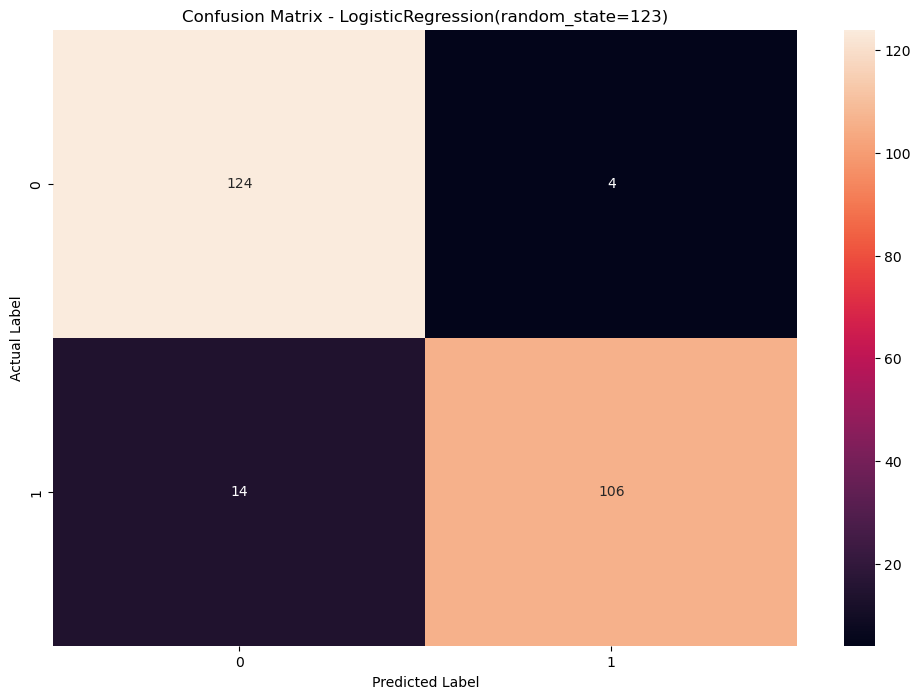

In [131]:
confusion1(logreg1)

#### **Decision Tree**

In [133]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(random_state=123)
dt1.fit(X1_train, y1_train)

eval_classification1(dt1)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 1.00
Precision (Test Set): 0.91
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9390017534312836


Accuracy: 92.34%
Precision: 91.06%
Recall: 93.33%
F1_Score: 92.18%
ROC_AUC: 92.37%


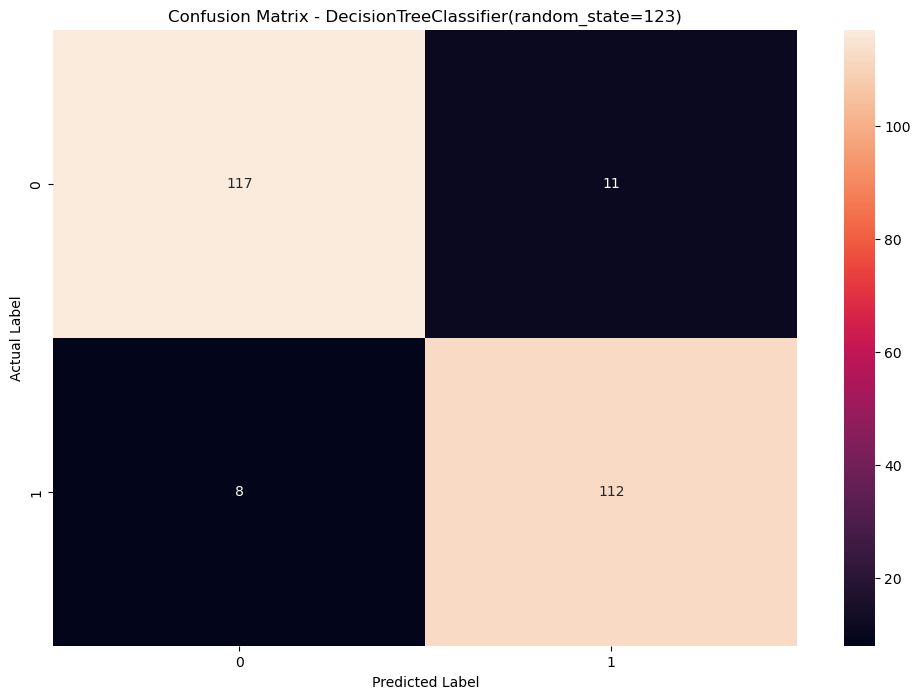

In [134]:
confusion1(dt1)

#### **Random Forest**

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=123)
rf1.fit(X1_train, y1_train)

eval_classification1(rf1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9578511397303344


Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 99.27%


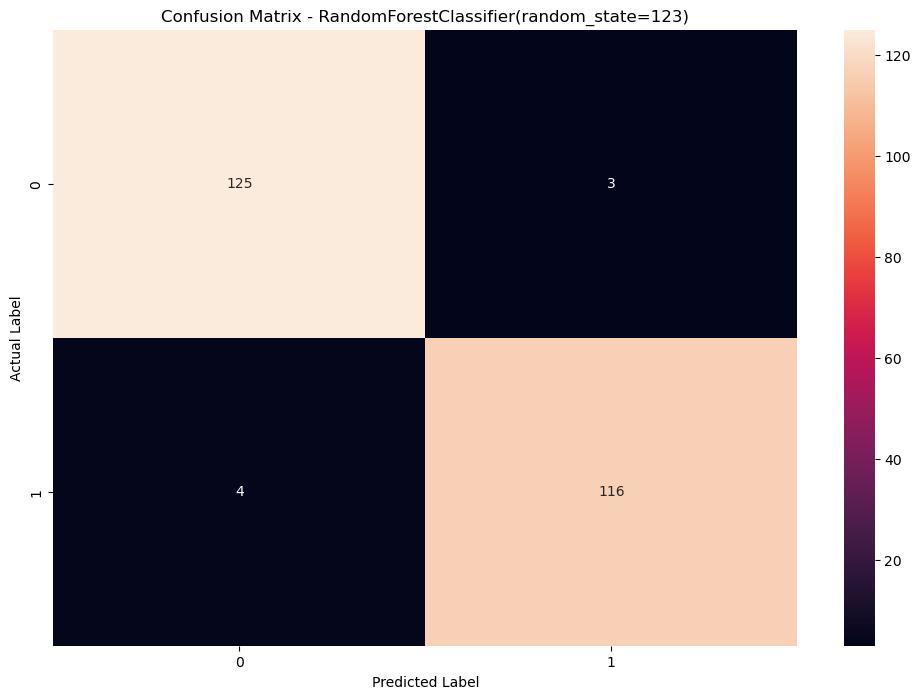

In [137]:
confusion1(rf1)

#### **K-Nearest Neighbours**

In [139]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)

eval_classification1(knn1)

Accuracy (Test Set): 0.64
Accuracy (Train Set): 0.77
Precision (Test Set): 0.67
Recall (Test Set): 0.49
Recall (Train Set): 0.73
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.64
roc_auc (train-proba): 0.86
Accuracy (crossval train): 0.7752305501325111
Accuracy (crossval test): 0.6828375355220992


Accuracy: 63.71%
Precision: 67.05%
Recall: 49.17%
F1_Score: 56.73%
ROC_AUC: 64.43%


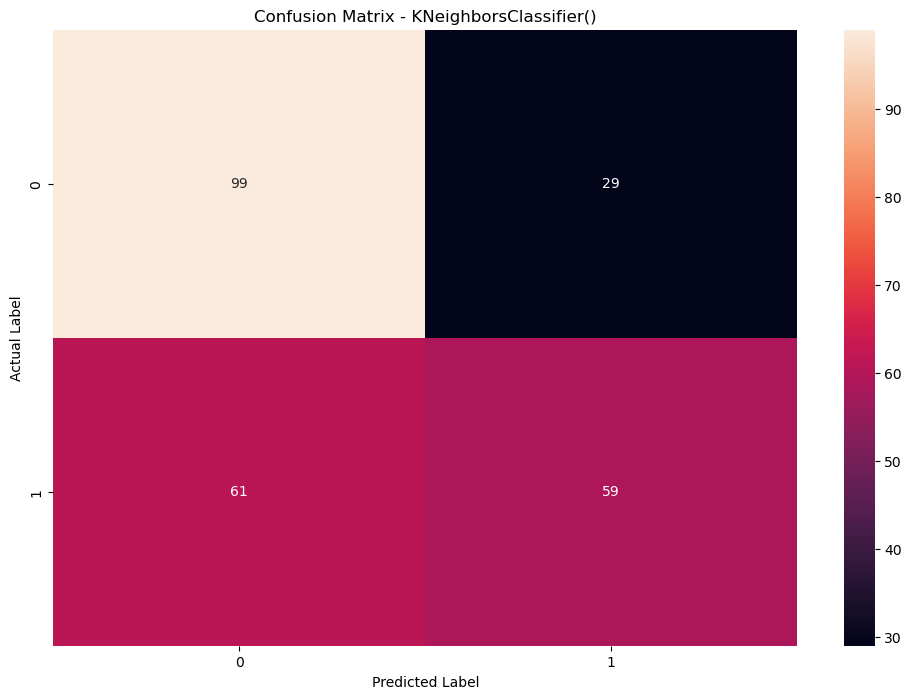

In [140]:
confusion1(knn1)

#### **Gradient Boosting**

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

gb1 = GradientBoostingClassifier(random_state=123)
gb1.fit(X1_train, y1_train)

eval_classification1(gb1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9998879551820729
Accuracy (crossval test): 0.9529113005623073


Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 98.79%


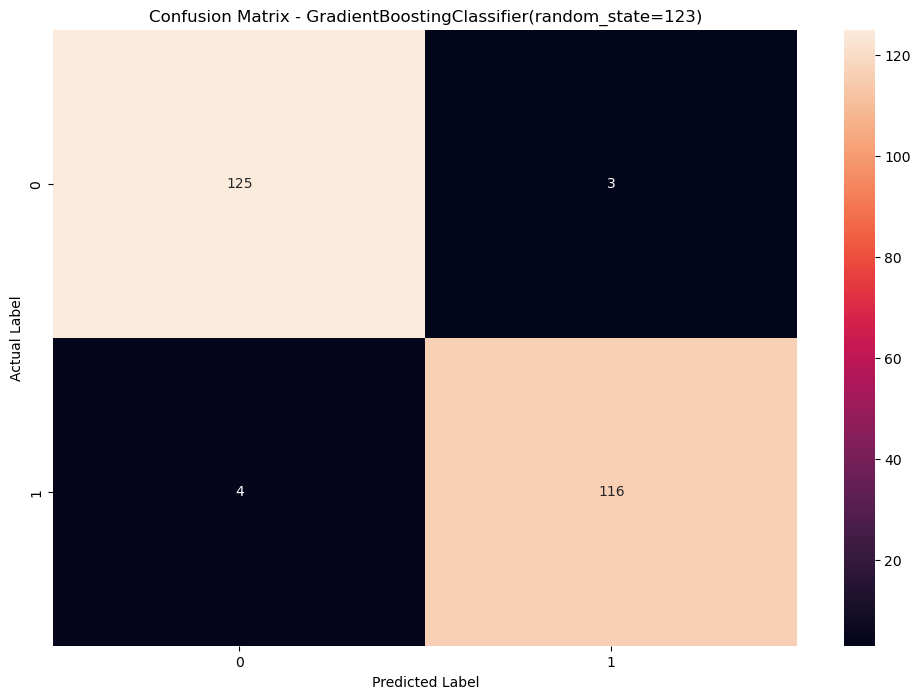

In [143]:
confusion1(gb1)

#### **XGBoost**

In [145]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(nthread=6, tree_method='hist', random_state=123)

xgb1.fit(X1_train, y1_train)

eval_classification1(xgb1)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.96
Recall (Train Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9520043533466352


Accuracy: 96.37%
Precision: 96.64%
Recall: 95.83%
F1_Score: 96.23%
ROC_AUC: 98.95%


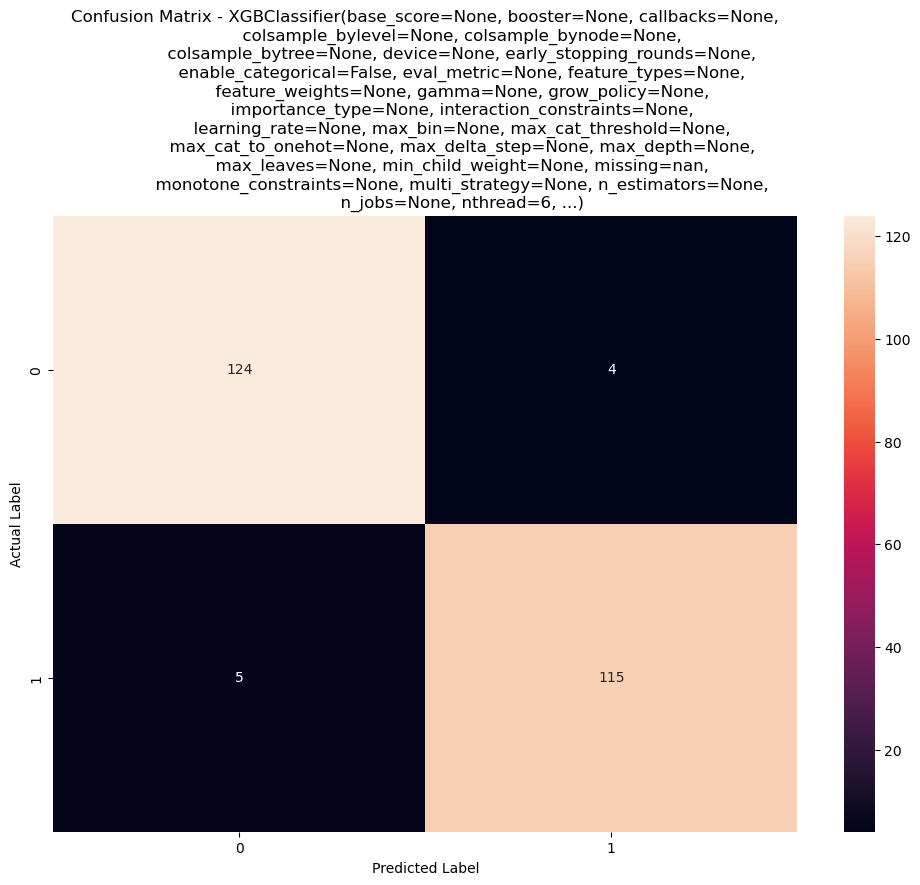

In [146]:
confusion1(xgb1)

**As can be seen in the above section, overfitting exists in a few of the models tested. Hyperparameter tuning will be done to sort this issue.**

### **Hyperparameter Tuning**

In [149]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression1': Pipeline([('clf', LogisticRegression(random_state=123))]),
            'decisiontree1':Pipeline([('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest1':Pipeline([('clf', RandomForestClassifier(random_state = 123))]),
            'knn1':Pipeline([('clf', KNeighborsClassifier())]),
            'gb1':Pipeline([('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost1': Pipeline([('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr1 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt1 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf1 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn1 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb1 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb1 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression1':hyperparameters_lr1,
                   'decisiontree1':hyperparameters_dt1,
                   'randomforest1':hyperparameters_rf1,
                   'knn1':hyperparameters_knn1,
                   'gb1':hyperparameters_gb1,
                   'xgboost1': hyperparameters_xgb1}

In [150]:
fitted_models1, fit_time1 = grid_pipe1(pipelines,hyperparameters,scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits


C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:239: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


The logisticregression1 model has been fitted.
Total Fit Time: 159.323s
Best accuracy: 0.934
Best params:
 {'clf__C': 0.9395151515151515, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree1 model has been fitted.
Total Fit Time: 99.078s
Best accuracy: 0.908
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest1 model has been fitted.
Total Fit Time: 140.972s
Best accuracy: 0.948
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 100} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn1 model has been fitted.
Total Fit Time: 206.209s
Best accuracy: 0.721
Best params:
 {'clf__algorithm': 

### **After Hyperparameter Tuning**

#### **Logistic Regression**

In [153]:
logreg1_tuned = LogisticRegression(random_state=123, C = 0.004424242424242424, penalty = 'l2', solver = 'newton-cg')
logreg1_tuned.fit(X1_train, y1_train)

eval_classification1(logreg1_tuned)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:239: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.95
Recall (Test Set): 0.88
Recall (Train Set): 0.89
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.97


C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: 

Accuracy (crossval train): 0.9239645757292817
Accuracy (crossval test): 0.9241550275107323


C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:239: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy: 91.94%
Precision: 95.45%
Recall: 87.50%
F1_Score: 91.30%
ROC_AUC: 97.00%


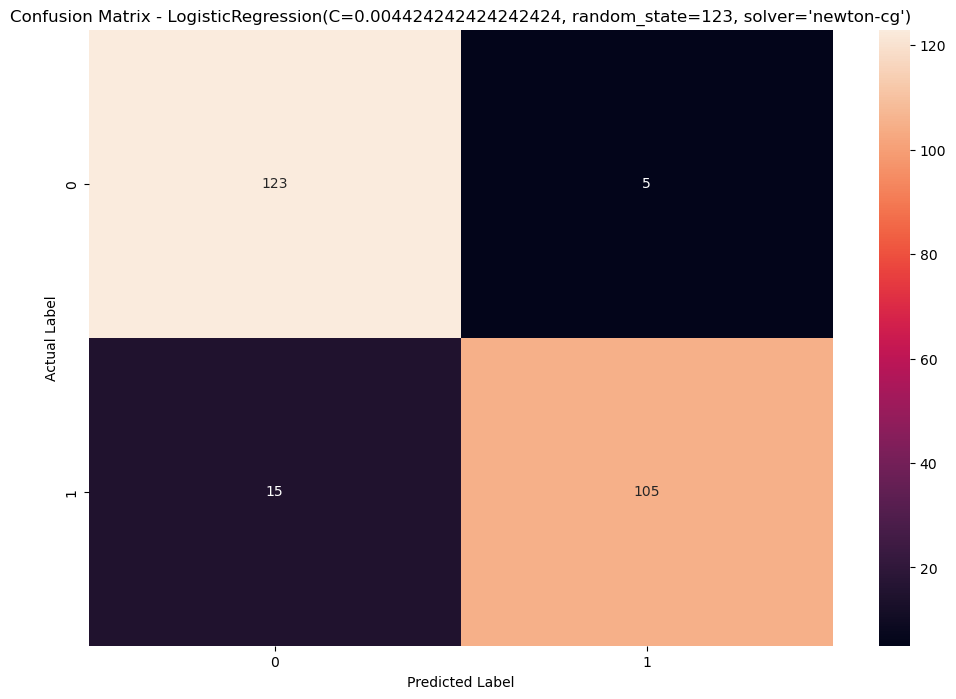

In [154]:
confusion1(logreg1_tuned)

#### **Decision Tree**

In [156]:
dt1_tuned = DecisionTreeClassifier(random_state=123, criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 26, splitter = 'best')
dt1_tuned.fit(X1_train, y1_train)

eval_classification1(dt1_tuned)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.86
Recall (Train Set): 0.92
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9332673136594707
Accuracy (crossval test): 0.892771630691094


Accuracy: 91.53%
Precision: 96.26%
Recall: 85.83%
F1_Score: 90.75%
ROC_AUC: 96.89%


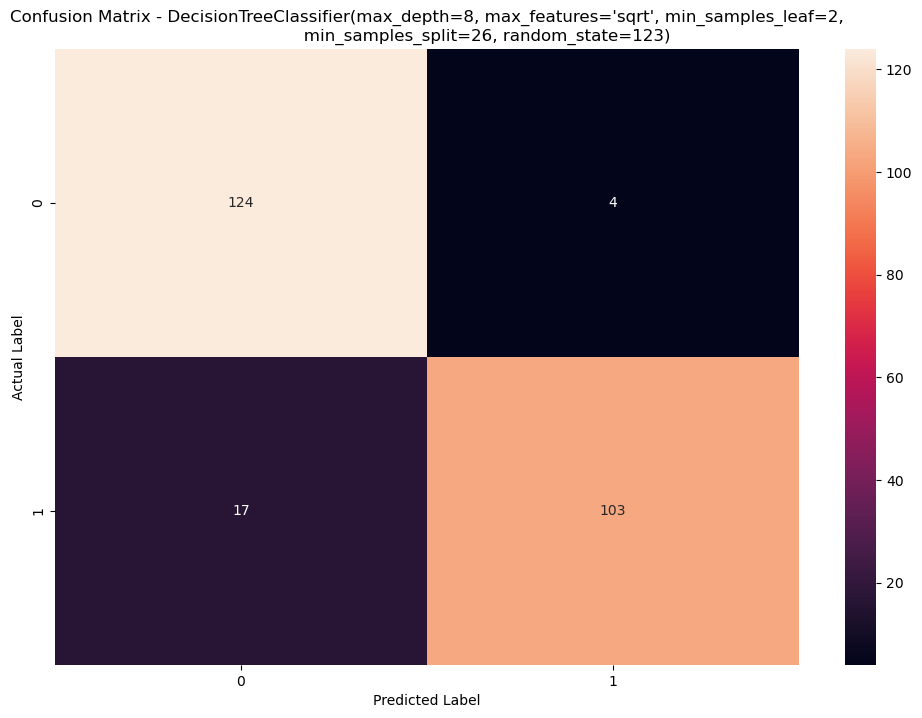

In [157]:
confusion1(dt1_tuned)

#### **Random Forest**

In [159]:
rf1_tuned = RandomForestClassifier(random_state=123, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 75)
rf1_tuned.fit(X1_train, y1_train)

eval_classification1(rf1_tuned)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.959399032340209
Accuracy (crossval test): 0.9479775077090515


Accuracy: 96.37%
Precision: 95.87%
Recall: 96.67%
F1_Score: 96.27%
ROC_AUC: 98.68%


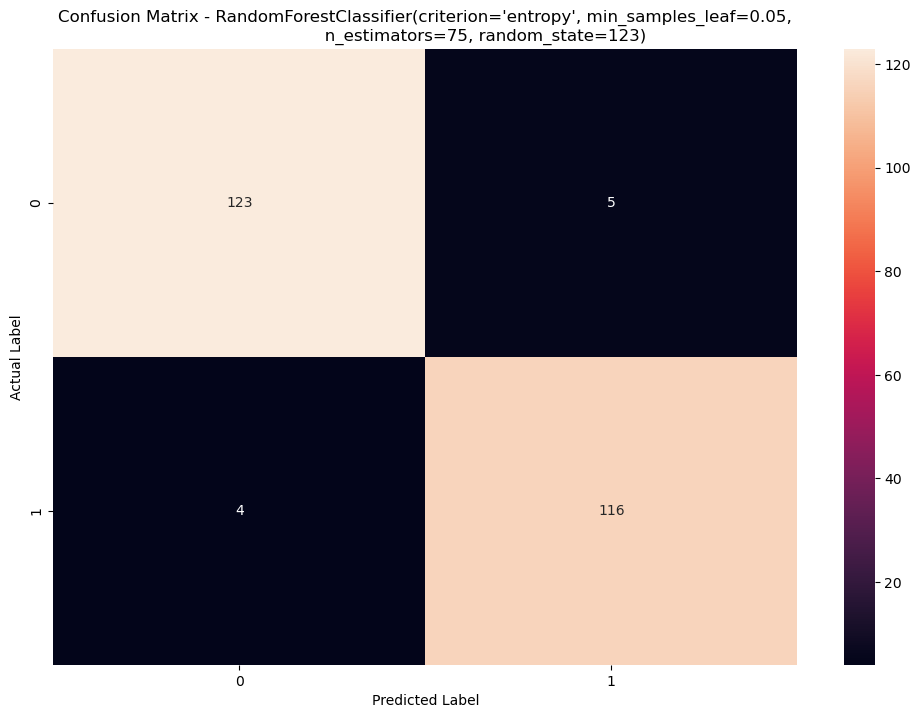

In [160]:
confusion1(rf1_tuned)

#### **K-Nearest Neighbours**

In [162]:
knn1_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 23, p = 1, weights = 'uniform')
knn1_tuned.fit(X1_train, y1_train)

eval_classification1(knn1_tuned)

Accuracy (Test Set): 0.67
Accuracy (Train Set): 0.74
Precision (Test Set): 0.73
Recall (Test Set): 0.52
Recall (Train Set): 0.66
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.80
Accuracy (crossval train): 0.7350819115524998
Accuracy (crossval test): 0.7213767458733903


Accuracy: 67.34%
Precision: 72.94%
Recall: 51.67%
F1_Score: 60.49%
ROC_AUC: 69.66%


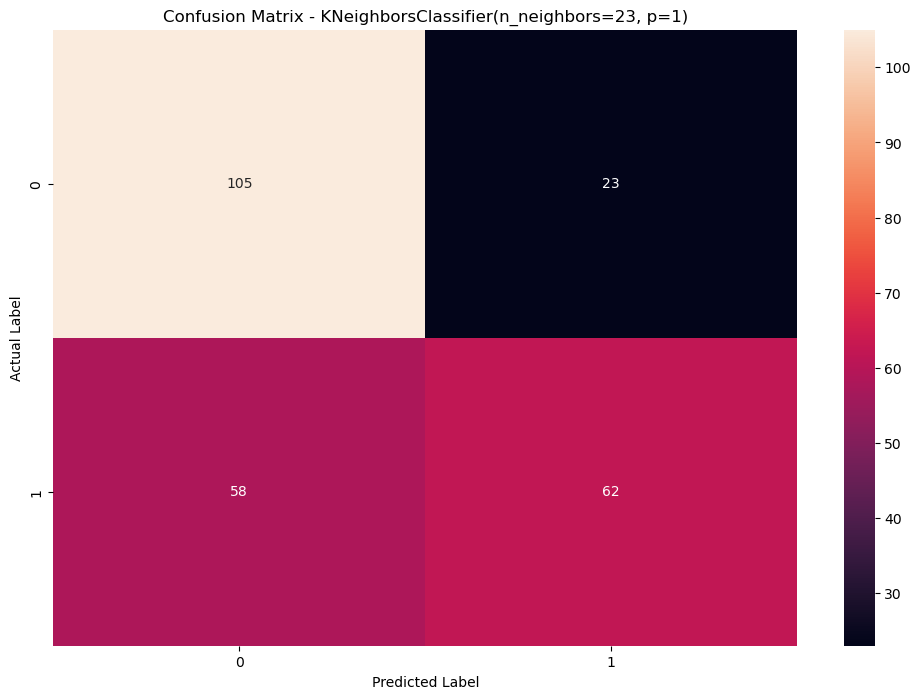

In [163]:
confusion1(knn1_tuned)

#### **Gradient Boosting**

In [165]:
gb1_tuned = GradientBoostingClassifier(random_state=123, criterion = 'friedman_mse', loss = 'exponential',
                                       max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
gb1_tuned.fit(X1_train, y1_train)

eval_classification1(gb1_tuned)

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.99
Precision (Test Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9863154420017165
Accuracy (crossval test): 0.9591843521373723


Accuracy: 97.58%
Precision: 98.31%
Recall: 96.67%
F1_Score: 97.48%
ROC_AUC: 98.74%


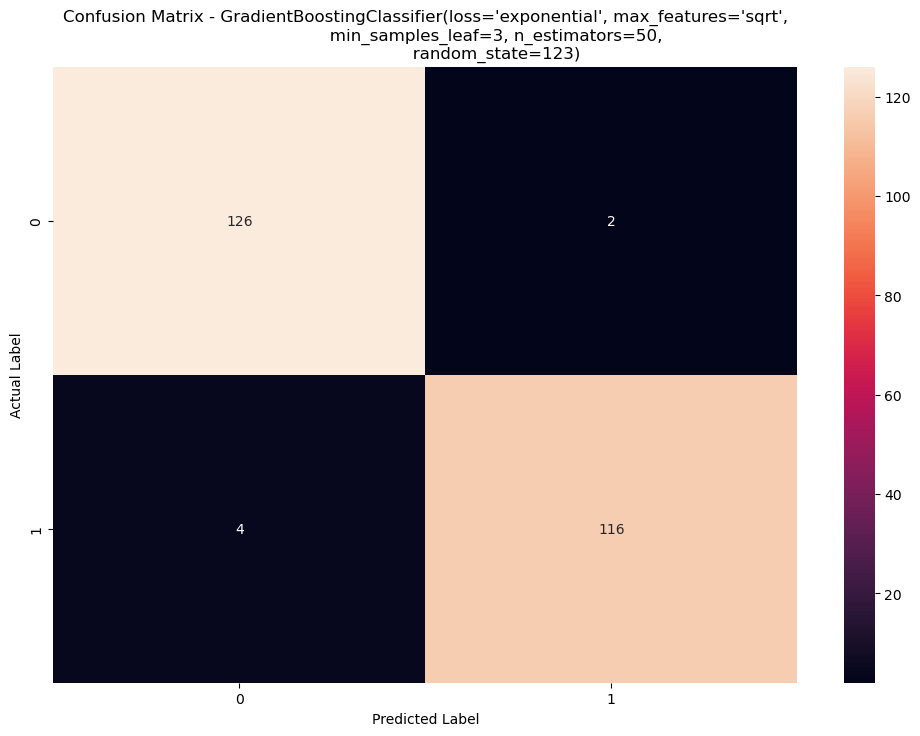

In [166]:
confusion1(gb1_tuned)

#### **XGBoost**

In [168]:
xgb1_tuned = XGBClassifier(nthread=6, tree_method='hist', random_state=123, eta = 0.22631578947368422, max_depth = 1)

xgb1_tuned.fit(X1_train, y1_train)

eval_classification1(xgb1_tuned)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9786907355534805
Accuracy (crossval test): 0.9596378257452084


Accuracy: 96.77%
Precision: 96.67%
Recall: 96.67%
F1_Score: 96.67%
ROC_AUC: 98.72%


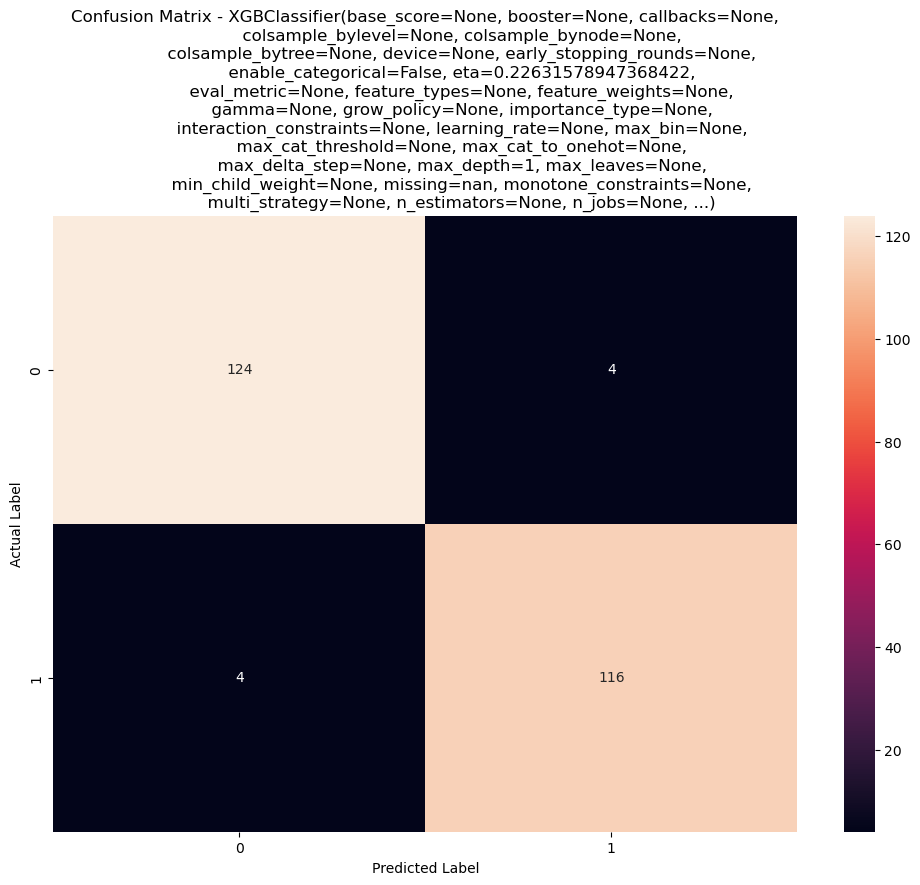

In [169]:
confusion1(xgb1_tuned)

**As can be seen in the above section, Overfitting has been significantly reduced.**

## After normalization/standardization

### **Helper Functions**

In [173]:
from sklearn.pipeline import Pipeline

def eval_classification2(model):
    y_pred = model.predict(X2_test)
    y_pred_train = model.predict(X2_train_scaled)
    y_pred_proba = model.predict_proba(X2_test)
    y_pred_proba_train = model.predict_proba(X2_train_scaled)

    model1 = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y2_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model1, X=X2_train, y=y2_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe2(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models2={}
    fit_time2 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(X2_train, y2_train)
        end = time.time()
        fit_time2.append(round(end-start, 2))
        #Append model
        fitted_models2[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models2, fit_time2

def confusion2(model):
    y_pred_proba = model.predict_proba(X2_test)
    y_predict = model.predict(X2_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

### **Vanilla Models**

#### **Logistic Regression**

In [176]:
logreg2 = LogisticRegression(random_state=123, max_iter=10000)
logreg2.fit(X2_train_scaled, y2_train)

eval_classification2(logreg2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9694934404738328
Accuracy (crossval test): 0.9632172440897275


Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 98.48%


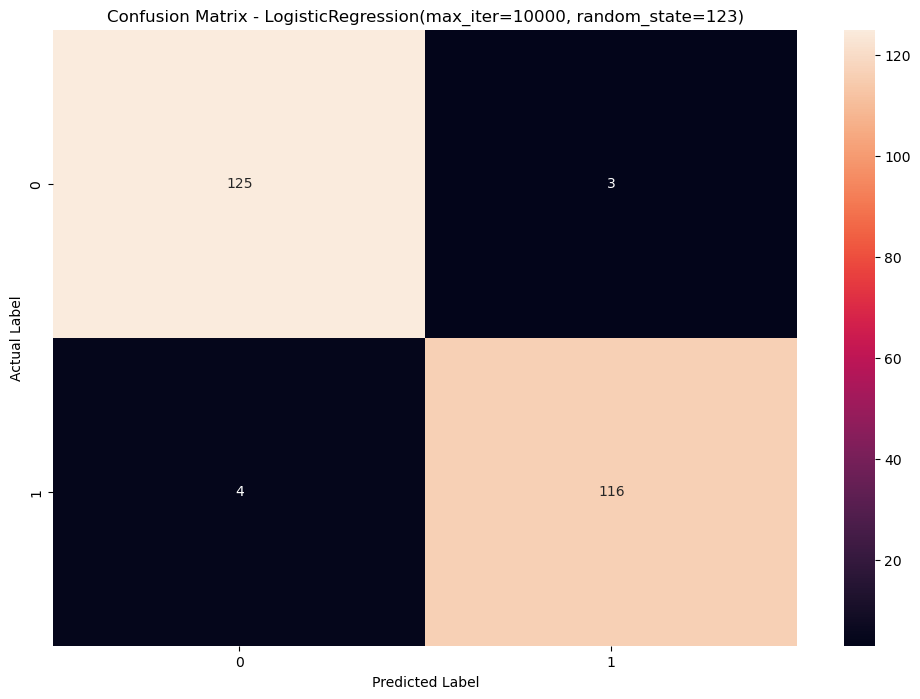

In [177]:
confusion2(logreg2)

#### **Decision Tree**

In [179]:
dt2 = DecisionTreeClassifier(random_state=123)
dt2.fit(X2_train_scaled, y2_train)

eval_classification2(dt2)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 1.00
Precision (Test Set): 0.91
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9394491807243486


Accuracy: 92.34%
Precision: 91.06%
Recall: 93.33%
F1_Score: 92.18%
ROC_AUC: 92.37%


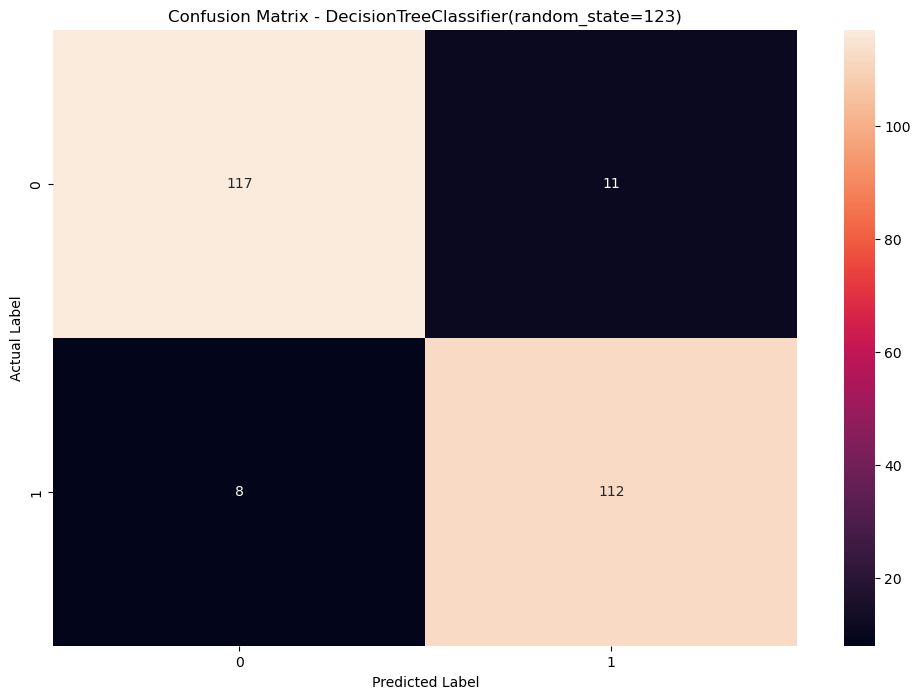

In [180]:
confusion2(dt2)

#### **Random Forest**

In [182]:
rf2 = RandomForestClassifier(random_state=123)
rf2.fit(X2_train_scaled, y2_train)

eval_classification2(rf2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9583015901807849


Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 99.27%


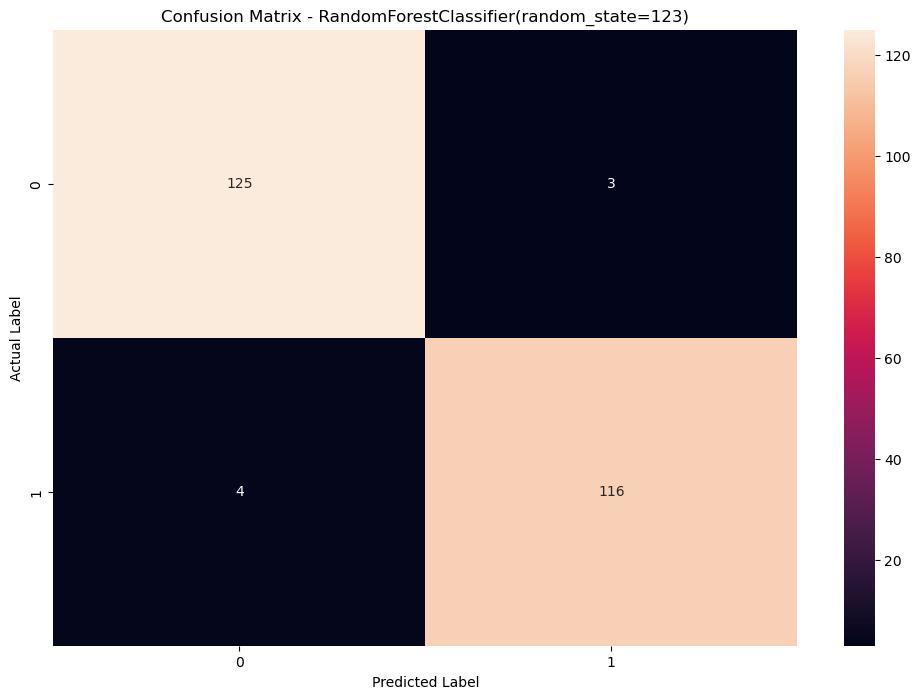

In [183]:
confusion2(rf2)

#### **K-Nearest Neighbours**

In [185]:
knn2 = KNeighborsClassifier()
knn2.fit(X2_train_scaled, y2_train)

eval_classification2(knn2)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.88
Recall (Train Set): 0.90
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9565950824774355
Accuracy (crossval test): 0.9475089183142874


Accuracy: 93.15%
Precision: 97.25%
Recall: 88.33%
F1_Score: 92.58%
ROC_AUC: 97.83%


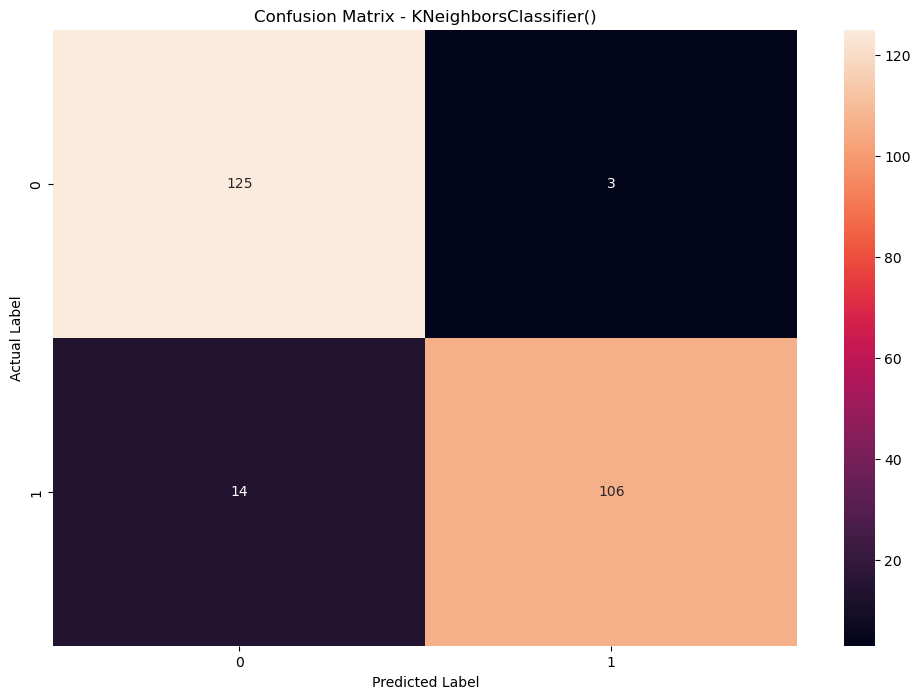

In [186]:
confusion2(knn2)

#### **Gradient Boosting**

In [188]:
gb2 = GradientBoostingClassifier(random_state=123)
gb2.fit(X2_train_scaled, y2_train)

eval_classification2(gb2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9998879551820729
Accuracy (crossval test): 0.9529113005623073


Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 98.79%


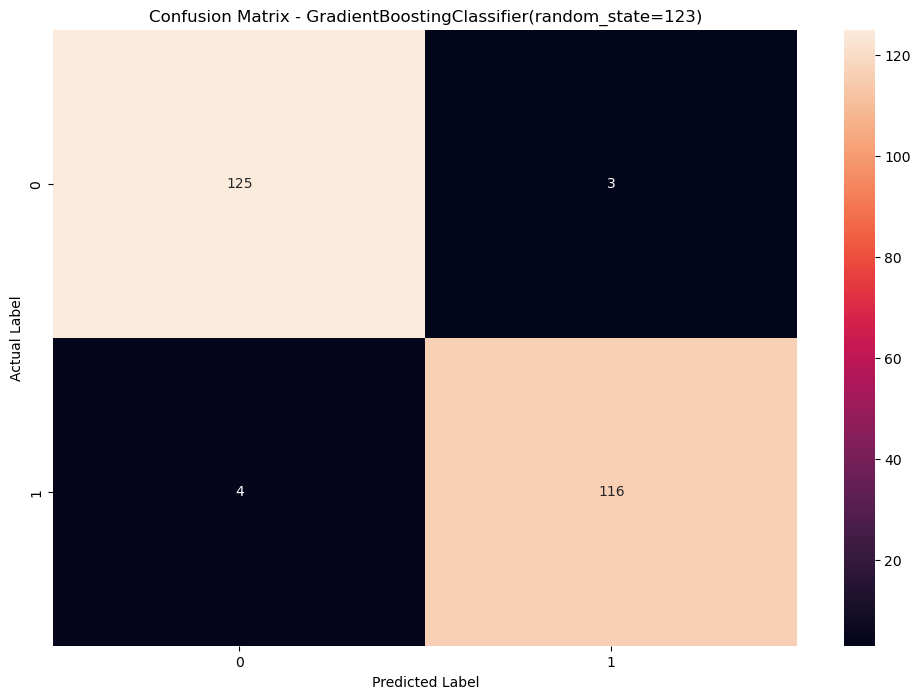

In [189]:
confusion2(gb2)

#### **XGBoost**

In [191]:
xgb2 = XGBClassifier(nthread=6, tree_method='hist', random_state=123)

xgb2.fit(X2_train_scaled, y2_train)

eval_classification2(xgb2)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.96
Recall (Train Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9520043533466352


Accuracy: 96.37%
Precision: 96.64%
Recall: 95.83%
F1_Score: 96.23%
ROC_AUC: 98.95%


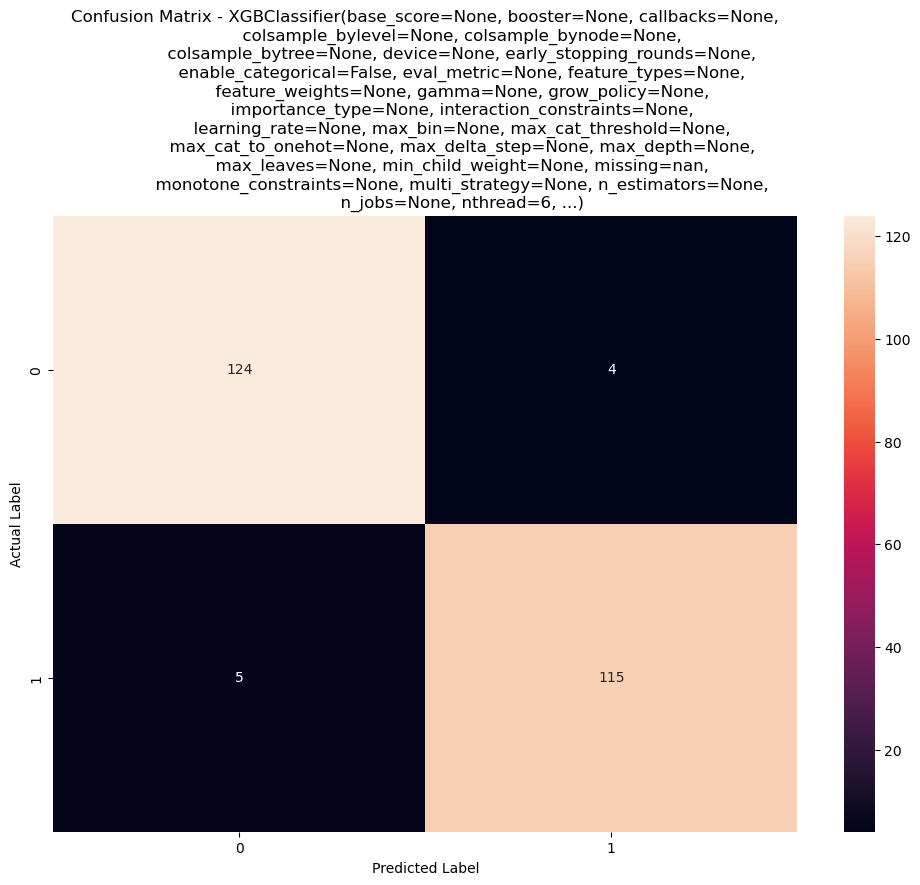

In [192]:
confusion2(xgb2)

**As can be seen from the above section, overfitting still exists in a few of the models tested. Hyperparameter tuning will be done on each model to rectify this issue.**

### **Hyperparameter Tuning**

In [195]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression2': Pipeline([('scaling', StandardScaler()), ('clf', LogisticRegression(random_state=123))]),
            'decisiontree2':Pipeline([('scaling', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest2':Pipeline([('scaling', StandardScaler()), ('clf', RandomForestClassifier(random_state = 123))]),
            'knn2':Pipeline([('scaling', StandardScaler()), ('clf', KNeighborsClassifier())]),
            'gb2':Pipeline([('scaling', StandardScaler()), ('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost2': Pipeline([('scaling', StandardScaler()), ('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr2 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt2 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf2 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn2 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb2 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb2 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression2':hyperparameters_lr2,
                   'decisiontree2':hyperparameters_dt2,
                   'randomforest2':hyperparameters_rf2,
                   'knn2':hyperparameters_knn2,
                   'gb2':hyperparameters_gb2,
                   'xgboost2': hyperparameters_xgb2}

In [196]:
fitted_models2, fit_time2 = grid_pipe2(pipelines,hyperparameters,scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression2 model has been fitted.
Total Fit Time: 57.078s
Best accuracy: 0.966
Best params:
 {'clf__C': 0.2842626262626263, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree2 model has been fitted.
Total Fit Time: 127.655s
Best accuracy: 0.908
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest2 model has been fitted.
Total Fit Time: 211.395s
Best accuracy: 0.948
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 100} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn2 model has been fitted.
Total Fit Time

### **After Hyperparameter Tuning**

#### **Logistic Regression**

In [199]:
logreg2_tuned = LogisticRegression(random_state=123, C = 0.7883030303030303, max_iter = 10000, penalty = 'l2', solver = 'newton-cg')
logreg2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(logreg2_tuned)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9689322732459988
Accuracy (crossval test): 0.9632172440897275


Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 98.50%


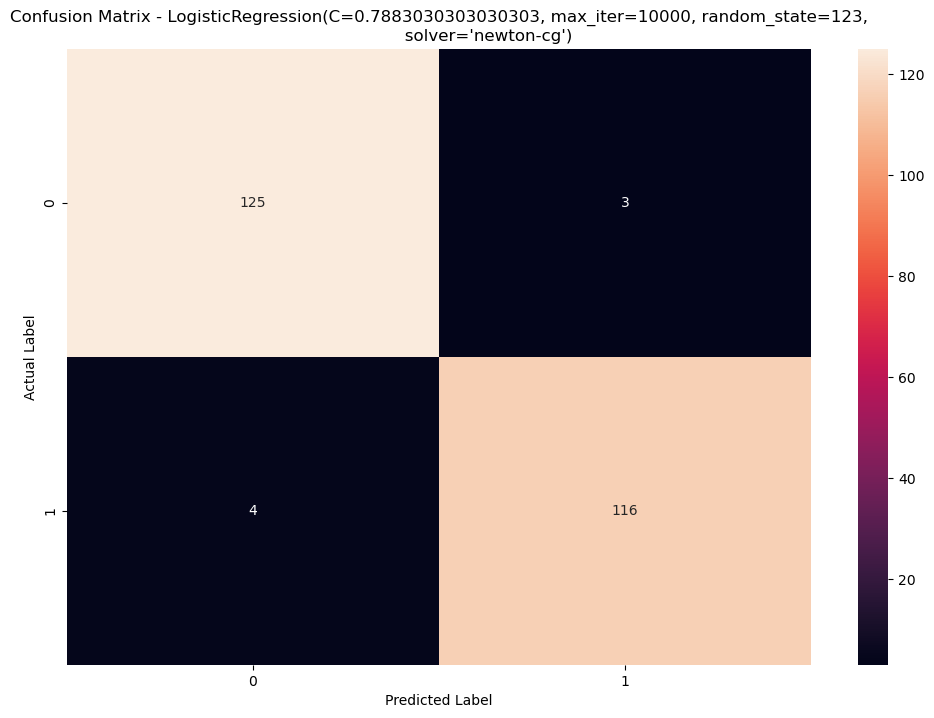

In [200]:
confusion2(logreg2_tuned)

#### **Decision Tree**

In [202]:
dt2_tuned = DecisionTreeClassifier(random_state=123, criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 26, splitter = 'best')
dt2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(dt2_tuned)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.86
Recall (Train Set): 0.92
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9332673136594707
Accuracy (crossval test): 0.892771630691094


Accuracy: 91.53%
Precision: 96.26%
Recall: 85.83%
F1_Score: 90.75%
ROC_AUC: 96.88%


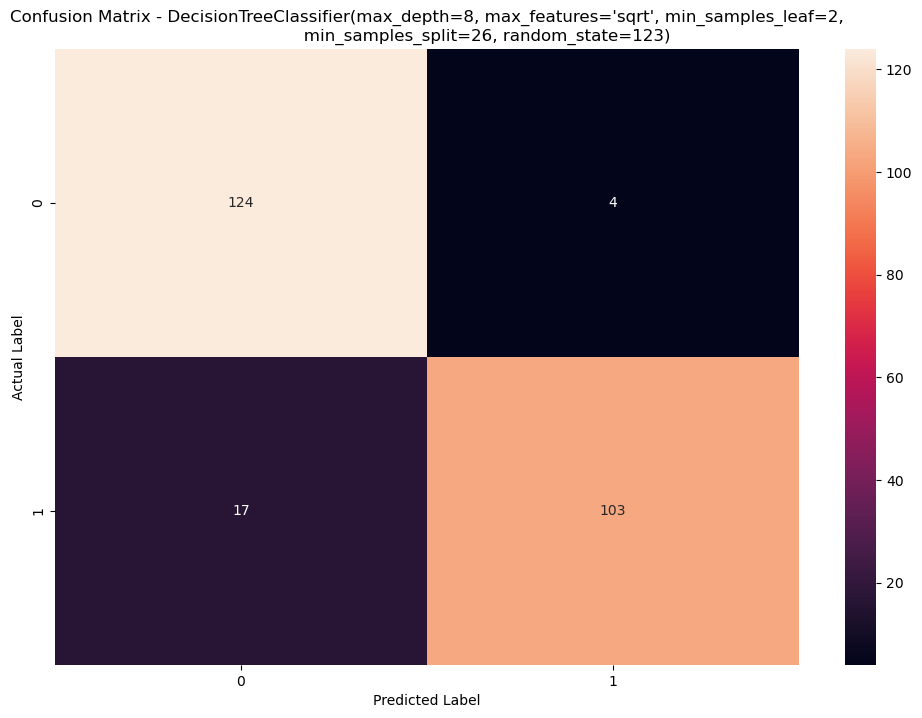

In [203]:
confusion2(dt2_tuned)

#### **Random Forest**

In [205]:
rf2_tuned = RandomForestClassifier(random_state=123, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 75)
rf2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(rf2_tuned)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.959399032340209
Accuracy (crossval test): 0.9479775077090515


Accuracy: 96.37%
Precision: 95.87%
Recall: 96.67%
F1_Score: 96.27%
ROC_AUC: 98.68%


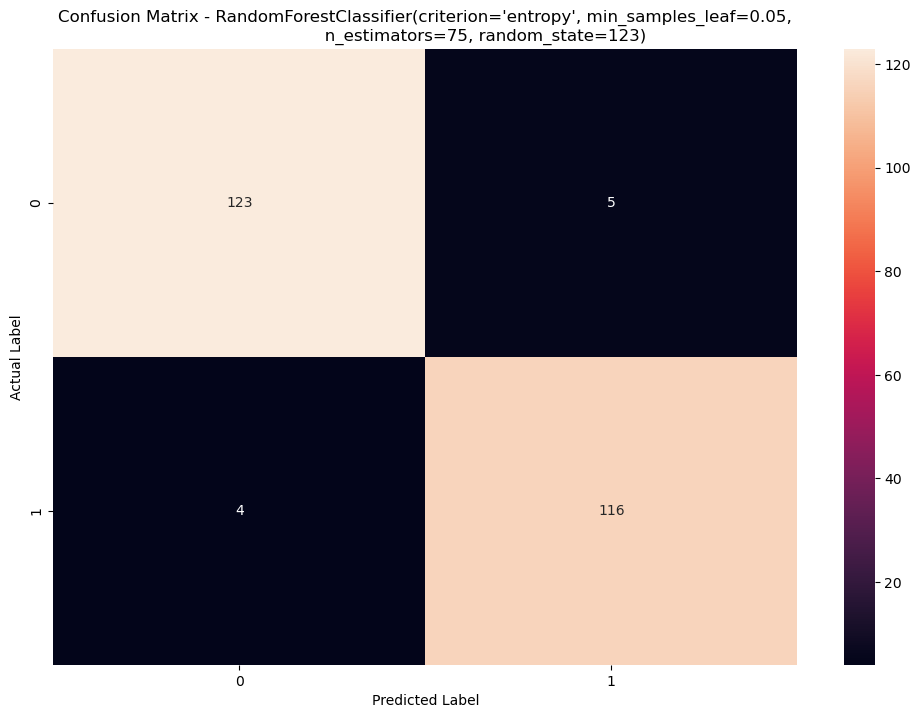

In [206]:
confusion2(rf2_tuned)

#### **K-Nearest Neighbours**

In [208]:
knn2_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 7, p = 2, weights = 'uniform')
knn2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(knn2_tuned)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.94
Precision (Test Set): 0.99
Recall (Test Set): 0.89
Recall (Train Set): 0.90
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9540155995057957
Accuracy (crossval test): 0.950205574702219


Accuracy: 94.35%
Precision: 99.07%
Recall: 89.17%
F1_Score: 93.86%
ROC_AUC: 97.78%


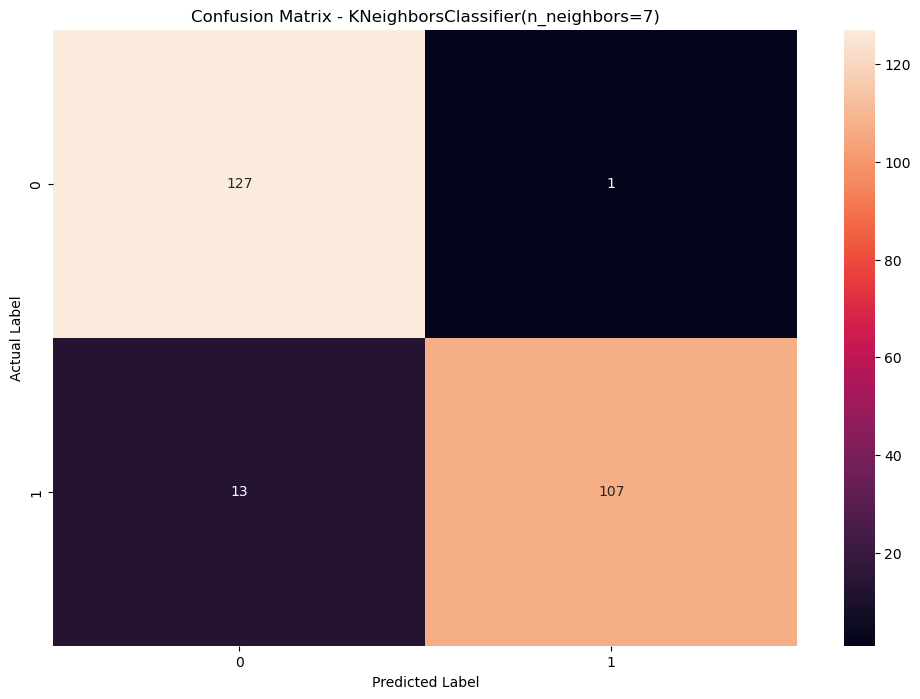

In [209]:
confusion2(knn2_tuned)

#### **Gradient Boosting**

In [211]:
gb2_tuned = GradientBoostingClassifier(random_state=123, criterion = 'friedman_mse', loss = 'exponential', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
gb2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(gb2_tuned)

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.99
Precision (Test Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9863154420017165
Accuracy (crossval test): 0.9591843521373723


Accuracy: 97.58%
Precision: 98.31%
Recall: 96.67%
F1_Score: 97.48%
ROC_AUC: 98.74%


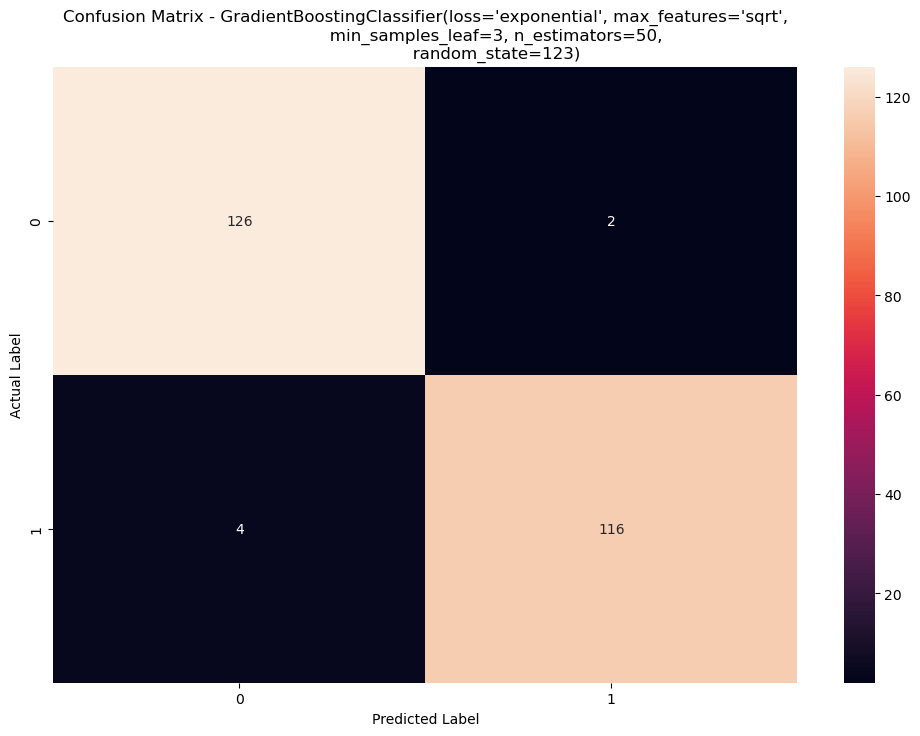

In [212]:
confusion2(gb2_tuned)

#### **XGBoost**

In [214]:
xgb2_tuned = XGBClassifier(nthread=6, tree_method='hist', random_state=123, eta = 0.22631578947368422, max_depth = 1)

xgb2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(xgb2_tuned)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9786907355534805
Accuracy (crossval test): 0.9596378257452084


Accuracy: 96.77%
Precision: 96.67%
Recall: 96.67%
F1_Score: 96.67%
ROC_AUC: 98.72%


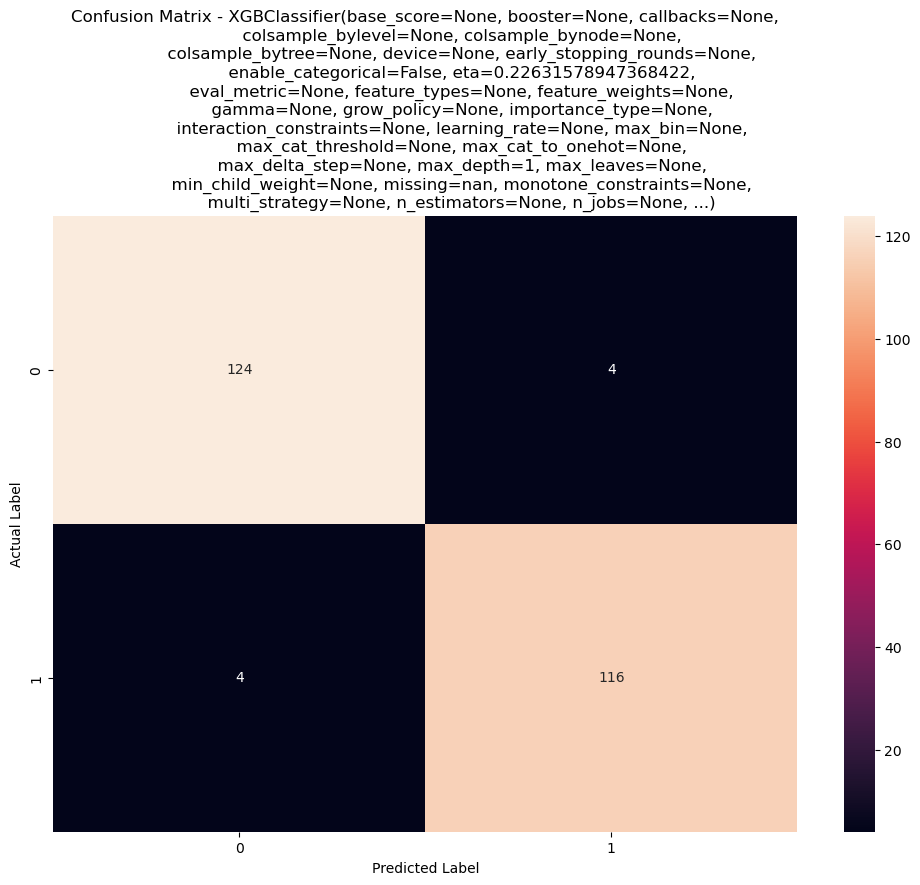

In [215]:
confusion2(xgb2_tuned)

**As can be seen from the above section, overfitting has been significantly reduced.**

## Model comparison

**Because the target has perfect class balance the primary metric that will be used is <code>Accuracy</code>. <code>Recall</code> will be the secondary metric as to minimize false negatives.**

### **Before normalization/standardization**

In [220]:
# Creating models dict
models1_dict = {}
models1_dict['logreg1'] = logreg1_tuned
models1_dict['dt1'] = dt1_tuned
models1_dict['rf1'] = rf1_tuned
models1_dict['knn1'] = knn1_tuned
models1_dict['gb1'] = gb1_tuned
models1_dict['xgb1'] = xgb1_tuned


In [221]:
# Creating eval data frame
accuracy_test1 = []
accuracy_train1 = []
recall_test_list1 = []
recall_train_list1 = []
accuracy_train_cv1 = []
accuracy_test_cv1 = []
time_elapsed1 = []
for name, model in models1_dict.items():
  start = time.time()
  y_pred1 = model.predict(X1_test)
  y_pred_train1 = model.predict(X1_train)
  end = time.time()

  acc_test1 = accuracy_score(y1_test, y_pred1)
  acc_train1 = accuracy_score(y1_train, y_pred_train1)
  recall_test1 = recall_score(y1_test, y_pred1)
  recall_train1 = recall_score(y1_train, y_pred_train1)

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
  score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
  acc_train_cv1 = score['train_score'].mean()
  acc_test_cv1 = score['test_score'].mean()

  accuracy_test1.append(acc_test1)
  accuracy_train1.append(acc_train1)
  recall_test_list1.append(recall_test1)
  recall_train_list1.append(recall_train1)
  accuracy_train_cv1.append(acc_train_cv1)
  accuracy_test_cv1.append(acc_test_cv1)
  time_elapsed1.append(end-start)

eval_dict1 = {'Model': models1_dict.keys(),
             'Accuracy_test': accuracy_test1,
             'Accuracy_train': accuracy_train1,
             'Recall_test': recall_test_list1,
             'Recall train': recall_train_list1,
             'Accuracy_test_crossval': accuracy_test_cv1,
             'Accuracy_train_crossval': accuracy_train_cv1,
             'Time_elapsed': time_elapsed1,
             'Fit_time': fit_time1}

eval_df1 = pd.DataFrame(data=eval_dict1)
eval_df1 = eval_df1.set_index('Model')

eval_df1.style.format(precision=3)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: 

,Accuracy_test,Accuracy_train,Recall_test,Recall train,Accuracy_test_crossval,Accuracy_train_crossval,Time_elapsed,Fit_time
Model,,,,,,,,
logreg1,0.919,0.915,0.875,0.887,0.924,0.924,0.000,159.320
dt1,0.915,0.946,0.858,0.922,0.893,0.933,0.016,99.080
rf1,0.964,0.960,0.967,0.965,0.948,0.959,0.021,140.970
knn1,0.673,0.736,0.517,0.660,0.721,0.735,0.063,206.210
gb1,0.976,0.987,0.967,0.978,0.959,0.986,0.022,153.870
xgb1,0.968,0.977,0.967,0.965,0.960,0.979,0.016,28.630


****
**Analysis:**
- <code>Decision Tree</code> had the lowest fit time of all the models but the second lowest accuracy overall.
- <code>Gradient Boosting</code> had the highest accuracy and recall scores but <code>XGBoost</code> is not far behind.
- Due to the non-normalized data, distance based algorithms like <code>K-Nearest Neighbours</code> and linear algorithms like <code>Logistic Regression</code> suffered heavily.
  - <code>Logistic Regression</code> could not converge properly using newton-cg and as a result had the highest fit time of all the models, even though it probably is the simplest model of them all.
  - <code>K-Nearest Neighbours</code> suffered in accuracy and recall scores, with both being by far the lowest of all the models tested.

### **After normalization/standardization**

In [224]:
# Creating models dict
models2_dict = {}
models2_dict['logreg2'] = logreg2_tuned
models2_dict['dt2'] = dt2_tuned
models2_dict['rf2'] = rf2_tuned
models2_dict['knn2'] = knn2_tuned
models2_dict['gb2'] = gb2_tuned
models2_dict['xgb2'] = xgb2_tuned


In [225]:
# Creating eval data frame
accuracy_test2 = []
accuracy_train2 = []
recall_test_list2 = []
recall_train_list2 = []
accuracy_train_cv2 = []
accuracy_test_cv2 = []
time_elapsed2 = []

for name, model in models2_dict.items():
  start = time.time()
  y_pred2 = model.predict(X2_test)
  y_pred_train2 = model.predict(X2_train_scaled)
  end = time.time()

  model1 = Pipeline([
  ('scaling', StandardScaler()),
  ('classification', model)
  ])

  acc_test2 = accuracy_score(y2_test, y_pred2)
  acc_train2 = accuracy_score(y2_train, y_pred_train2)
  recall_test2 = recall_score(y2_test, y_pred2)
  recall_train2 = recall_score(y2_train, y_pred_train2)

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
  score = cross_validate(model1, X=X2_train, y=y2_train, cv=cv, scoring='accuracy', return_train_score=True)
  acc_train_cv2 = score['train_score'].mean()
  acc_test_cv2 = score['test_score'].mean()

  accuracy_test2.append(acc_test2)
  accuracy_train2.append(acc_train2)
  recall_test_list2.append(recall_test2)
  recall_train_list2.append(recall_train2)
  accuracy_train_cv2.append(acc_train_cv2)
  accuracy_test_cv2.append(acc_test_cv2)
  time_elapsed2.append(end-start)

eval_dict2 = {'Model': models2_dict.keys(),
             'Accuracy_test': accuracy_test2,
             'Accuracy_train': accuracy_train2,
             'Recall_test': recall_test_list2,
             'Recall train': recall_train_list2,
             'Accuracy_test_crossval': accuracy_test_cv2,
             'Accuracy_train_crossval': accuracy_train_cv2,
             'Time_elapsed': time_elapsed2,
             'Fit_time': fit_time2}

eval_df2 = pd.DataFrame(data=eval_dict2)
eval_df2 = eval_df2.set_index('Model')
eval_df2.style.format(precision=3)

,Accuracy_test,Accuracy_train,Recall_test,Recall train,Accuracy_test_crossval,Accuracy_train_crossval,Time_elapsed,Fit_time
Model,,,,,,,,
logreg2,0.972,0.970,0.967,0.957,0.963,0.969,0.016,57.080
dt2,0.915,0.946,0.858,0.922,0.893,0.933,0.000,127.660
rf2,0.964,0.960,0.967,0.965,0.948,0.959,0.016,211.400
knn2,0.944,0.945,0.892,0.898,0.950,0.954,0.047,242.770
gb2,0.976,0.987,0.967,0.978,0.959,0.986,0.000,150.490
xgb2,0.968,0.977,0.967,0.965,0.960,0.979,0.000,26.180


****
**Analysis:**
- <code>K-Nearest Neighbours</code> had the highest fit time and elapsed time.
- <code>Gradient Boosting</code> had the highest accuracy and the highest recall (tied with <code>Random Forest</code>), but <code>Logistic Regression</code> in close second, had the highest cross-validated accuracy of all the models tested.
- <code>Random Forest</code> and <code>XGBoost</code> also had nearly identical scores in close third and fourth, although <code>XGBoost</code> had the better fit and elapsed times.
- With normalized data, the previously poor performing distance based and linear models have shone through.
  - <code>Logistic Regression</code>'s fit and elapsed times had been reduced significantly making it the model with the lowest times. It's scores have also massively improved making it a close second-place model.
  - <code>K-Nearest Neighbours</code> also saw massive improvement in its scores, with the model no longer sitting in last place in terms of scores.

### **Conclusion**

**By taking consideration of not only the above metrics but also the simplicity, explainability and fit and elapsed times, the model that will be chosen is the <code>Logistic Regression</code> model with normalization/standardization. This is not only because of the very high scores (especially cross-validated scores) but also the simplicity, explainability and relatively quick fit and elapsed times.**

## Selected model

### **Learning curve of the selected model**

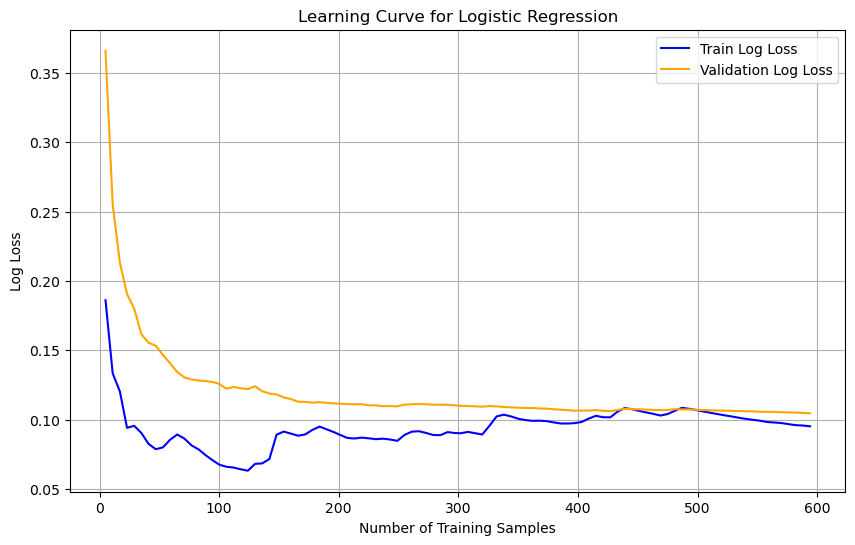

In [231]:
#Importing Required Libraries and Modules
from sklearn.model_selection import learning_curve

model = Pipeline([
('scaling', StandardScaler()),
('classification', logreg2_tuned)
])

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
sizes, training_scores, testing_scores = learning_curve(estimator=model, X=X2_train, y=y2_train, cv=cv, scoring='neg_log_loss', train_sizes=np.linspace(0.01, 1, 100))

# Mean and Standard Deviation of training scores
mean_training = -np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = -np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, mean_training, label='Train Log Loss', color='blue')
plt.plot(sizes, mean_testing, label='Validation Log Loss', color='orange')
plt.xlabel('Number of Training Samples')
plt.ylabel('Log Loss')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

**As can be seen from the above learning curve, the tuned <code>Logistic Regression</code> model with normalization/standardization is well fitted with no overfitting/underfitting.**

### **Confusion matrix of the selected model**

In [234]:
def confusion_train(model):
    y_pred_proba = model.predict_proba(X2_train_scaled)
    y_predict = model.predict(X2_train_scaled)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_train, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_train, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_train, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_train, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_train, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_train, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix Train Set - Logistic Regression')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

def confusion_test(model):
    y_pred_proba = model.predict_proba(X2_test)
    y_predict = model.predict(X2_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix Test Set - Logistic Regression')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 97.04%
Precision: 98.34%
Recall: 95.69%
F1_Score: 96.99%
ROC_AUC: 99.30%


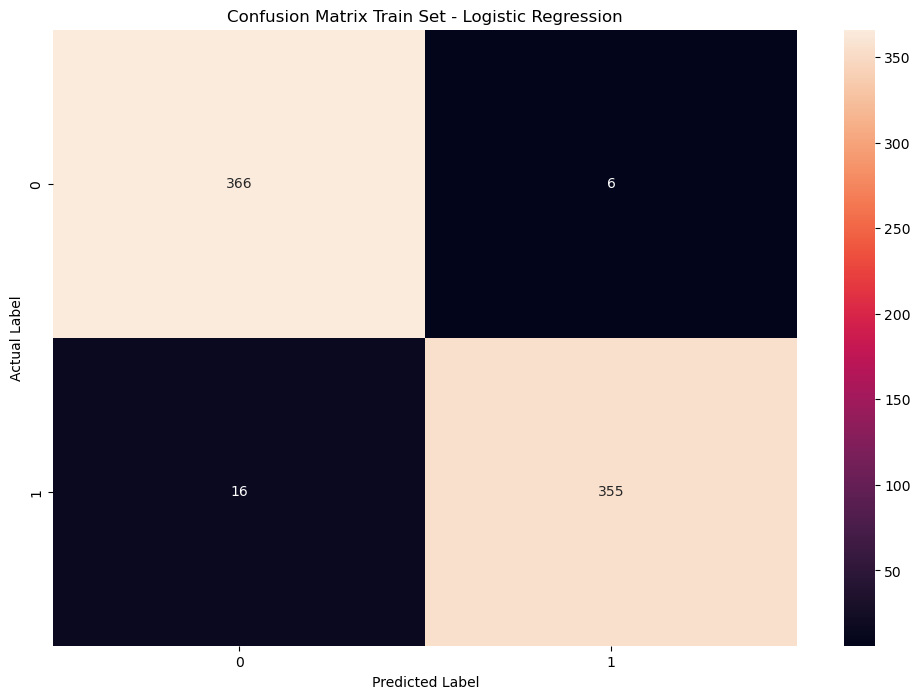

In [235]:
confusion_train(logreg2_tuned)

Accuracy: 97.18%
Precision: 97.48%
Recall: 96.67%
F1_Score: 97.07%
ROC_AUC: 98.50%


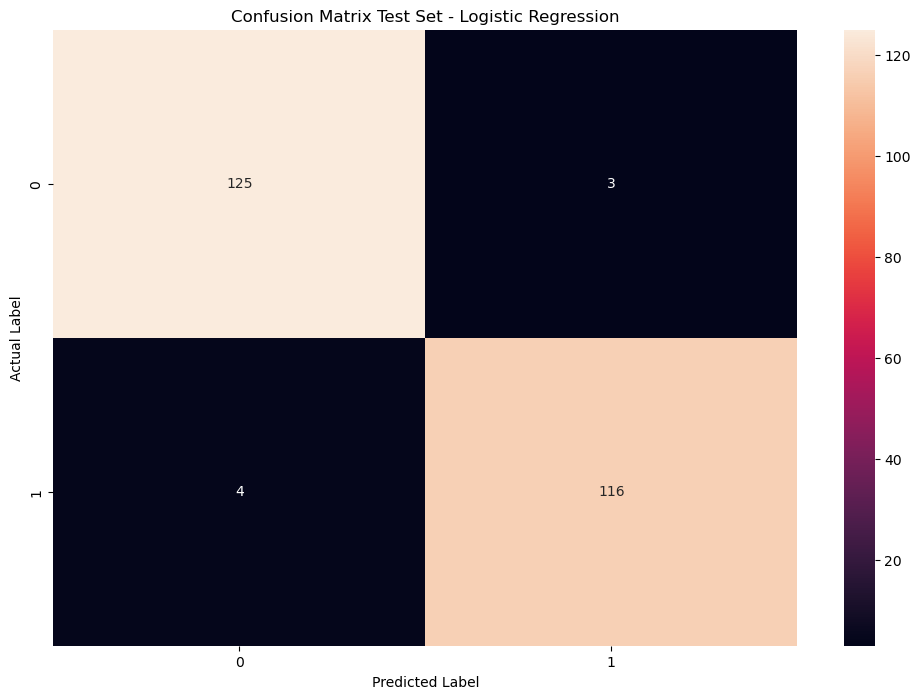

In [236]:
confusion_test(logreg2_tuned)

****
**Analysis:**

**From the test set confusion matrix above, from 120 people that clicked on an ad the algorithm correctly classified 116 of them and incorrectly classified 4 of them. Similarly, out of 128 people that did not click on an ad the algorithm correctly classified 124 of them and incorrectly classified only 4.**

**Based on the confusion matrix of both the train set and the test set and also the learning curve, it can be seen that <code>Logistic Regression</code> is a more than capable model to be implemented on this dataset.**

## Feature importance

**Since <code>Logistic Regression</code> is such a simple and explainable model, to get the feature importance we can simply look at the <code>coefficients</code> of each feature in the model.**

**The <code>coefficients</code> represent the change in the log odds for a one-unit change in the feature variable. Larger absolute values indicate a stronger relationship between the feature and the target variable, while the sign of the <code>coefficients</code> (negative or positive) indicates the direction of the relationship between the two.**

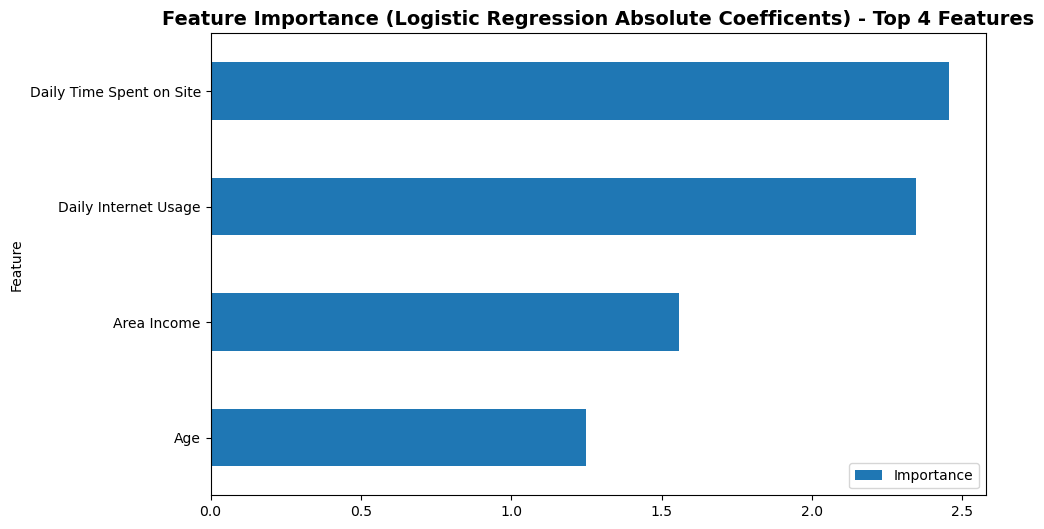

In [240]:
coefficients = logreg2_tuned.coef_[0]

feature_importance = pd.DataFrame({'Feature': X2.columns, 'Coefficients': coefficients, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance = feature_importance.tail(4)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Logistic Regression Absolute Coefficents) - Top 4 Features', fontsize=14, fontweight = 'bold')

plt.show()

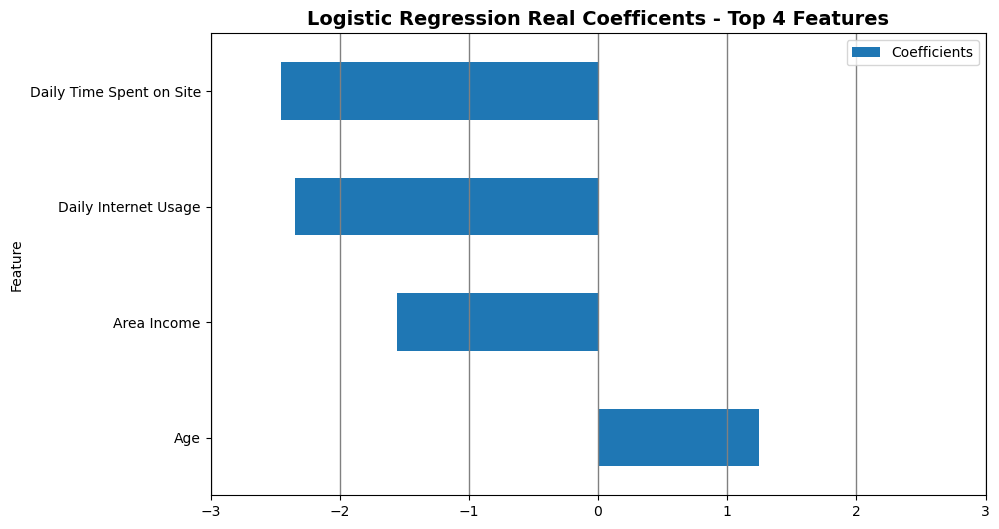

In [241]:
feature_importance.plot(x='Feature', y='Coefficients', kind='barh', figsize=(10, 6))
plt.title('Logistic Regression Real Coefficents - Top 4 Features', fontsize=14, fontweight = 'bold')
plt.xlim(-3, 3)
plt.grid(color='gray', linestyle='-', linewidth=1, axis='x')
plt.show()

****
**Analysis:**

**Based on the feature importance charts above, it can clearly be seen that the two features with most effect on the model are <code>Daily Time Spent on Site</code> and <code>Daily Internet Usage</code>.**
- The lower the <code>Daily Time Spent on Site</code> the bigger the odds that the customer will click on an ad and vice versa.
- Similarly, the lower the <code>Daily Internet Usage</code> the higher the chances that the customer will click on an ad and vice versa.

# Business Recommendation/Simulation

## Business Recommendation

**Based on the insights that have been gathered in the EDA as well as the feature importance from the model, the following business recommendations are formulated.**
****
- **Content Personalization and Targeting**:<br>
Since the lower the Daily Time Spent on Site is the more likely the user is to click on an ad, it's essential to focus on content personalization and user engagement. Tailor content to keep users engaged but not overloaded. This can be achieved through strategies like recommending relevant content and using user data to customize the user experience.

- **Age-Targeted Advertising**:<br>
Older individuals are more likely to engage with ads. Therefore we can consider creating ad campaigns that are specifically designed to target and appeal to older demographics. This may include promoting products or services relevant to their age group.

- **Income-Level Targeting**:<br>
Users in areas with lower income levels are more likely to click on ads. Therefore we can create ad campaigns that are budget-friendly and appealing to users with lower income. Additionally, consider tailoring the ad messaging to highlight cost-effective solutions.

- **Optimize Ad Placement for Active Internet Users**:<br>
Heavy internet users are less responsive to ads. To improve ad performance, consider optimizing ad placement for users with lower internet usage or finding ways to make ads stand out to this group, such as through eye-catching visuals or unique offers.

## Business simulation

In [247]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

**Using the original dataset's Clicked on Ad numbers as can be seen above, the business simulation of before and after model implementation are as follows:**

**Assumption:**

Cost per Advertisement: Rp.1000

Revenue per Ad clicked: Rp.4000

**Before model implementation:**

- **No. Users Advertised**:<br>
Every User = 1000
- **Click Rate**: <br>
500/1000 = 50%
- **Total Cost**: <br>
No. Users Advertised x Cost per Ad = 1000 x 1000 = Rp.1,000,000
- **Total Revenue**: <br>
Click Rate x No. Users Advertised x Revenue per Ad Clicked = 0.5 x 1000 x 4000 = Rp.2,000,000
- **Total Profit**:<br>
Total Revenue - Total Cost = **Rp.1,000,000**

**After model implementation:**

- **No. Users Advertised**:<br>
(Precision x 500) + ((1-Specificity) x 500) = (96.67% x 500) + (0.03125 x 500) = 483 + 16 = 499
- **Click Rate**:<br>
(Precision x 500)/No. Users Advertised = 483/499 = 96.8%
- **Total Cost**:<br>
No. Users Advertised x Cost per Ad = 499 x 1000 = Rp.499,000
- **Total Revenue**:<br>
Click Rate x No. Users Advertised x Revenue per Ad Clicked = 0.968 x 499 x 4000 = Rp.1,932,000
- **Total Profit**:<br>
Total Revenue - Total Cost = 1,932,000 - 499,000 = **Rp.1,433,000**

****
**Conclusion:**

By comparing the profits and click rates of before and after model implementation, we can see that with model implementation click rate is up from **50%** to **96.8%**, and similarly profit is up from **Rp.1,000,000** to **Rp.1,433,000** (a **43.3%** increase).